In [ ]:
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib.pyplot as plt

!pip install skimpy
from skimpy import skim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
millenials = pd.read_csv('YoungAdults.csv')
millenials.head()

Music  Slowsongsorfastsongs  Dance  Folk  Country  Classicalmusic  Musical  \
0    5.0                   3.0    2.0   1.0      2.0             2.0      1.0   
1    4.0                   4.0    2.0   1.0      1.0             1.0      2.0   
2    5.0                   5.0    2.0   2.0      3.0             4.0      5.0   
3    5.0                   3.0    2.0   1.0      1.0             1.0      1.0   
4    5.0                   3.0    4.0   3.0      2.0             4.0      3.0   

   Pop  Rock  MetalorHardrock  ...  punctual_recode  lying_recode  \
0  5.0   5.0              1.0  ...                2             3   
1  3.0   5.0              4.0  ...                3             5   
2  3.0   5.0              3.0  ...                4             5   
3  2.0   2.0              1.0  ...                3             4   
4  5.0   3.0              1.0  ...                2             2   

   internet_recode  gender_recode  hand_recode  education_recode  town_recode  \
0                1              2            3                 2            3   
1                1              2            3                 2            2   
2                1              2            3                 7            2   
3                3              2            3                 2            2   
4                1              2            3                 7            3   

   house_recode  MeanSpendRating  Spend_Binary  
0             2             3.17           1.0  
1             2             3.00           0.0  
2             2             3.00           0.0  
3             3             3.17           1.0  
4             3             3.17           1.0  

[5 rows x 162 columns]

# Understanding the Variables

In [ ]:
#checking the number of rows and columns in our dataset
millenials.shape

(1010, 162)

In [ ]:
millenials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 162 entries, Music to Spend_Binary
dtypes: float64(136), int64(15), object(11)
memory usage: 1.2+ MB


In [ ]:
#checking for missing values
millenials.isnull().sum()

Music                   3
Slowsongsorfastsongs    2
Dance                   4
Folk                    5
Country                 5
                       ..
education_recode        0
town_recode             0
house_recode            0
MeanSpendRating         0
Spend_Binary            0
Length: 162, dtype: int64

In [ ]:
millenials.columns

Index(['Music', 'Slowsongsorfastsongs', 'Dance', 'Folk', 'Country',
       'Classicalmusic', 'Musical', 'Pop', 'Rock', 'MetalorHardrock',
       ...
       'punctual_recode', 'lying_recode', 'internet_recode', 'gender_recode',
       'hand_recode', 'education_recode', 'town_recode', 'house_recode',
       'MeanSpendRating', 'Spend_Binary'],
      dtype='object', length=162)

In [ ]:
millenials.describe()

Music  Slowsongsorfastsongs        Dance         Folk  \
count  1007.000000           1008.000000  1006.000000  1005.000000   
mean      4.731877              3.328373     3.113320     2.288557   
std       0.664049              0.833931     1.170568     1.138916   
min       1.000000              1.000000     1.000000     1.000000   
25%       5.000000              3.000000     2.000000     1.000000   
50%       5.000000              3.000000     3.000000     2.000000   
75%       5.000000              4.000000     4.000000     3.000000   
max       5.000000              5.000000     5.000000     5.000000   

           Country  Classicalmusic      Musical          Pop         Rock  \
count  1005.000000     1003.000000  1008.000000  1007.000000  1004.000000   
mean      2.123383        2.956132     2.761905     3.471698     3.761952   
std       1.076136        1.252570     1.260845     1.161400     1.184861   
min       1.000000        1.000000     1.000000     1.000000     1.000000   
25%       1.000000        2.000000     2.000000     3.000000     3.000000   
50%       2.000000        3.000000     3.000000     4.000000     4.000000   
75%       3.000000        4.000000     4.000000     4.000000     5.000000   
max       5.000000        5.000000     5.000000     5.000000     5.000000   

       MetalorHardrock  ...  punctual_recode  lying_recode  internet_recode  \
count      1007.000000  ...      1010.000000   1010.000000      1010.000000   
mean          2.361470  ...         2.880198      4.213861         1.392079   
std           1.372995  ...         0.817611      1.055359         0.708672   
min           1.000000  ...         1.000000      1.000000         1.000000   
25%           1.000000  ...         2.000000      4.000000         1.000000   
50%           2.000000  ...         3.000000      5.000000         1.000000   
75%           3.000000  ...         4.000000      5.000000         2.000000   
max           5.000000  ...         4.000000      5.000000         4.000000   

       gender_recode  hand_recode  education_recode  town_recode  \
count    1010.000000  1010.000000       1010.000000  1010.000000   
mean        2.400990     2.894059          5.650495     2.292079   
std         0.502323     0.317423          2.017177     0.463576   
min         1.000000     1.000000          1.000000     1.000000   
25%         2.000000     3.000000          5.000000     2.000000   
50%         2.000000     3.000000          7.000000     2.000000   
75%         3.000000     3.000000          7.000000     3.000000   
max         3.000000     3.000000          7.000000     3.000000   

       house_recode  MeanSpendRating  Spend_Binary  
count   1010.000000      1010.000000   1010.000000  
mean       2.402970         3.170129      0.528713  
std        0.498751         0.783633      0.499422  
min        1.000000         1.000000      0.000000  
25%        2.000000         2.670000      0.000000  
50%        2.000000         3.170000      1.000000  
75%        3.000000         3.670000      1.000000  
max        3.000000         5.000000      1.000000  

[8 rows x 151 columns]

# Analyzing relationships between variables

In [ ]:
#checking the correlation
millenials.corr().round(2)

Music  Slowsongsorfastsongs  Dance  Folk  Country  \
Music                  1.00                  0.10   0.08  0.03    -0.01   
Slowsongsorfastsongs   0.10                  1.00   0.20 -0.06    -0.07   
Dance                  0.08                  0.20   1.00  0.07     0.06   
Folk                   0.03                 -0.06   0.07  1.00     0.39   
Country               -0.01                 -0.07   0.06  0.39     1.00   
...                     ...                   ...    ...   ...      ...   
education_recode       0.04                 -0.03  -0.02 -0.07    -0.04   
town_recode           -0.00                  0.00   0.06  0.14     0.09   
house_recode          -0.01                  0.02   0.05  0.11     0.04   
MeanSpendRating        0.09                  0.06   0.16 -0.16    -0.07   
Spend_Binary           0.08                  0.06   0.11 -0.14    -0.07   

                      Classicalmusic  Musical   Pop  Rock  MetalorHardrock  \
Music                           0.06     0.06  0.08  0.17             0.03   
Slowsongsorfastsongs           -0.16    -0.07  0.06 -0.01             0.05   
Dance                          -0.09     0.07  0.43 -0.13            -0.23   
Folk                            0.37     0.26  0.02  0.06             0.07   
Country                         0.26     0.21  0.01  0.13             0.11   
...                              ...      ...   ...   ...              ...   
education_recode               -0.02     0.03  0.02 -0.02            -0.02   
town_recode                     0.02     0.03  0.02  0.00            -0.02   
house_recode                    0.00     0.02  0.00  0.02            -0.00   
MeanSpendRating                -0.10    -0.01  0.12 -0.05            -0.12   
Spend_Binary                   -0.07     0.00  0.11 -0.06            -0.13   

                      ...  punctual_recode  lying_recode  internet_recode  \
Music                 ...             0.02          0.01            -0.03   
Slowsongsorfastsongs  ...            -0.00         -0.02            -0.02   
Dance                 ...             0.03         -0.00            -0.01   
Folk                  ...             0.02          0.02            -0.01   
Country               ...             0.00         -0.05            -0.02   
...                   ...              ...           ...              ...   
education_recode      ...             0.01         -0.01            -0.04   
town_recode           ...            -0.05         -0.06             0.02   
house_recode          ...            -0.07         -0.05            -0.00   
MeanSpendRating       ...            -0.03         -0.02            -0.02   
Spend_Binary          ...            -0.01         -0.01            -0.05   

                      gender_recode  hand_recode  education_recode  \
Music                         -0.10         0.03              0.04   
Slowsongsorfastsongs           0.08         0.04             -0.03   
Dance                         -0.05         0.03             -0.02   
Folk                          -0.05         0.01             -0.07   
Country                        0.07        -0.01             -0.04   
...                             ...          ...               ...   
education_recode              -0.02         0.00              1.00   
town_recode                   -0.01        -0.01             -0.00   
house_recode                   0.00        -0.01             -0.05   
MeanSpendRating                0.09        -0.04             -0.02   
Spend_Binary                   0.07        -0.06             -0.02   

                      town_recode  house_recode  MeanSpendRating  Spend_Binary  
Music                       -0.00         -0.01             0.09          0.08  
Slowsongsorfastsongs         0.00          0.02             0.06          0.06  
Dance                        0.06          0.05             0.16          0.11  
Folk                         0.14          0.11            -0.16         -0.14  
Country      

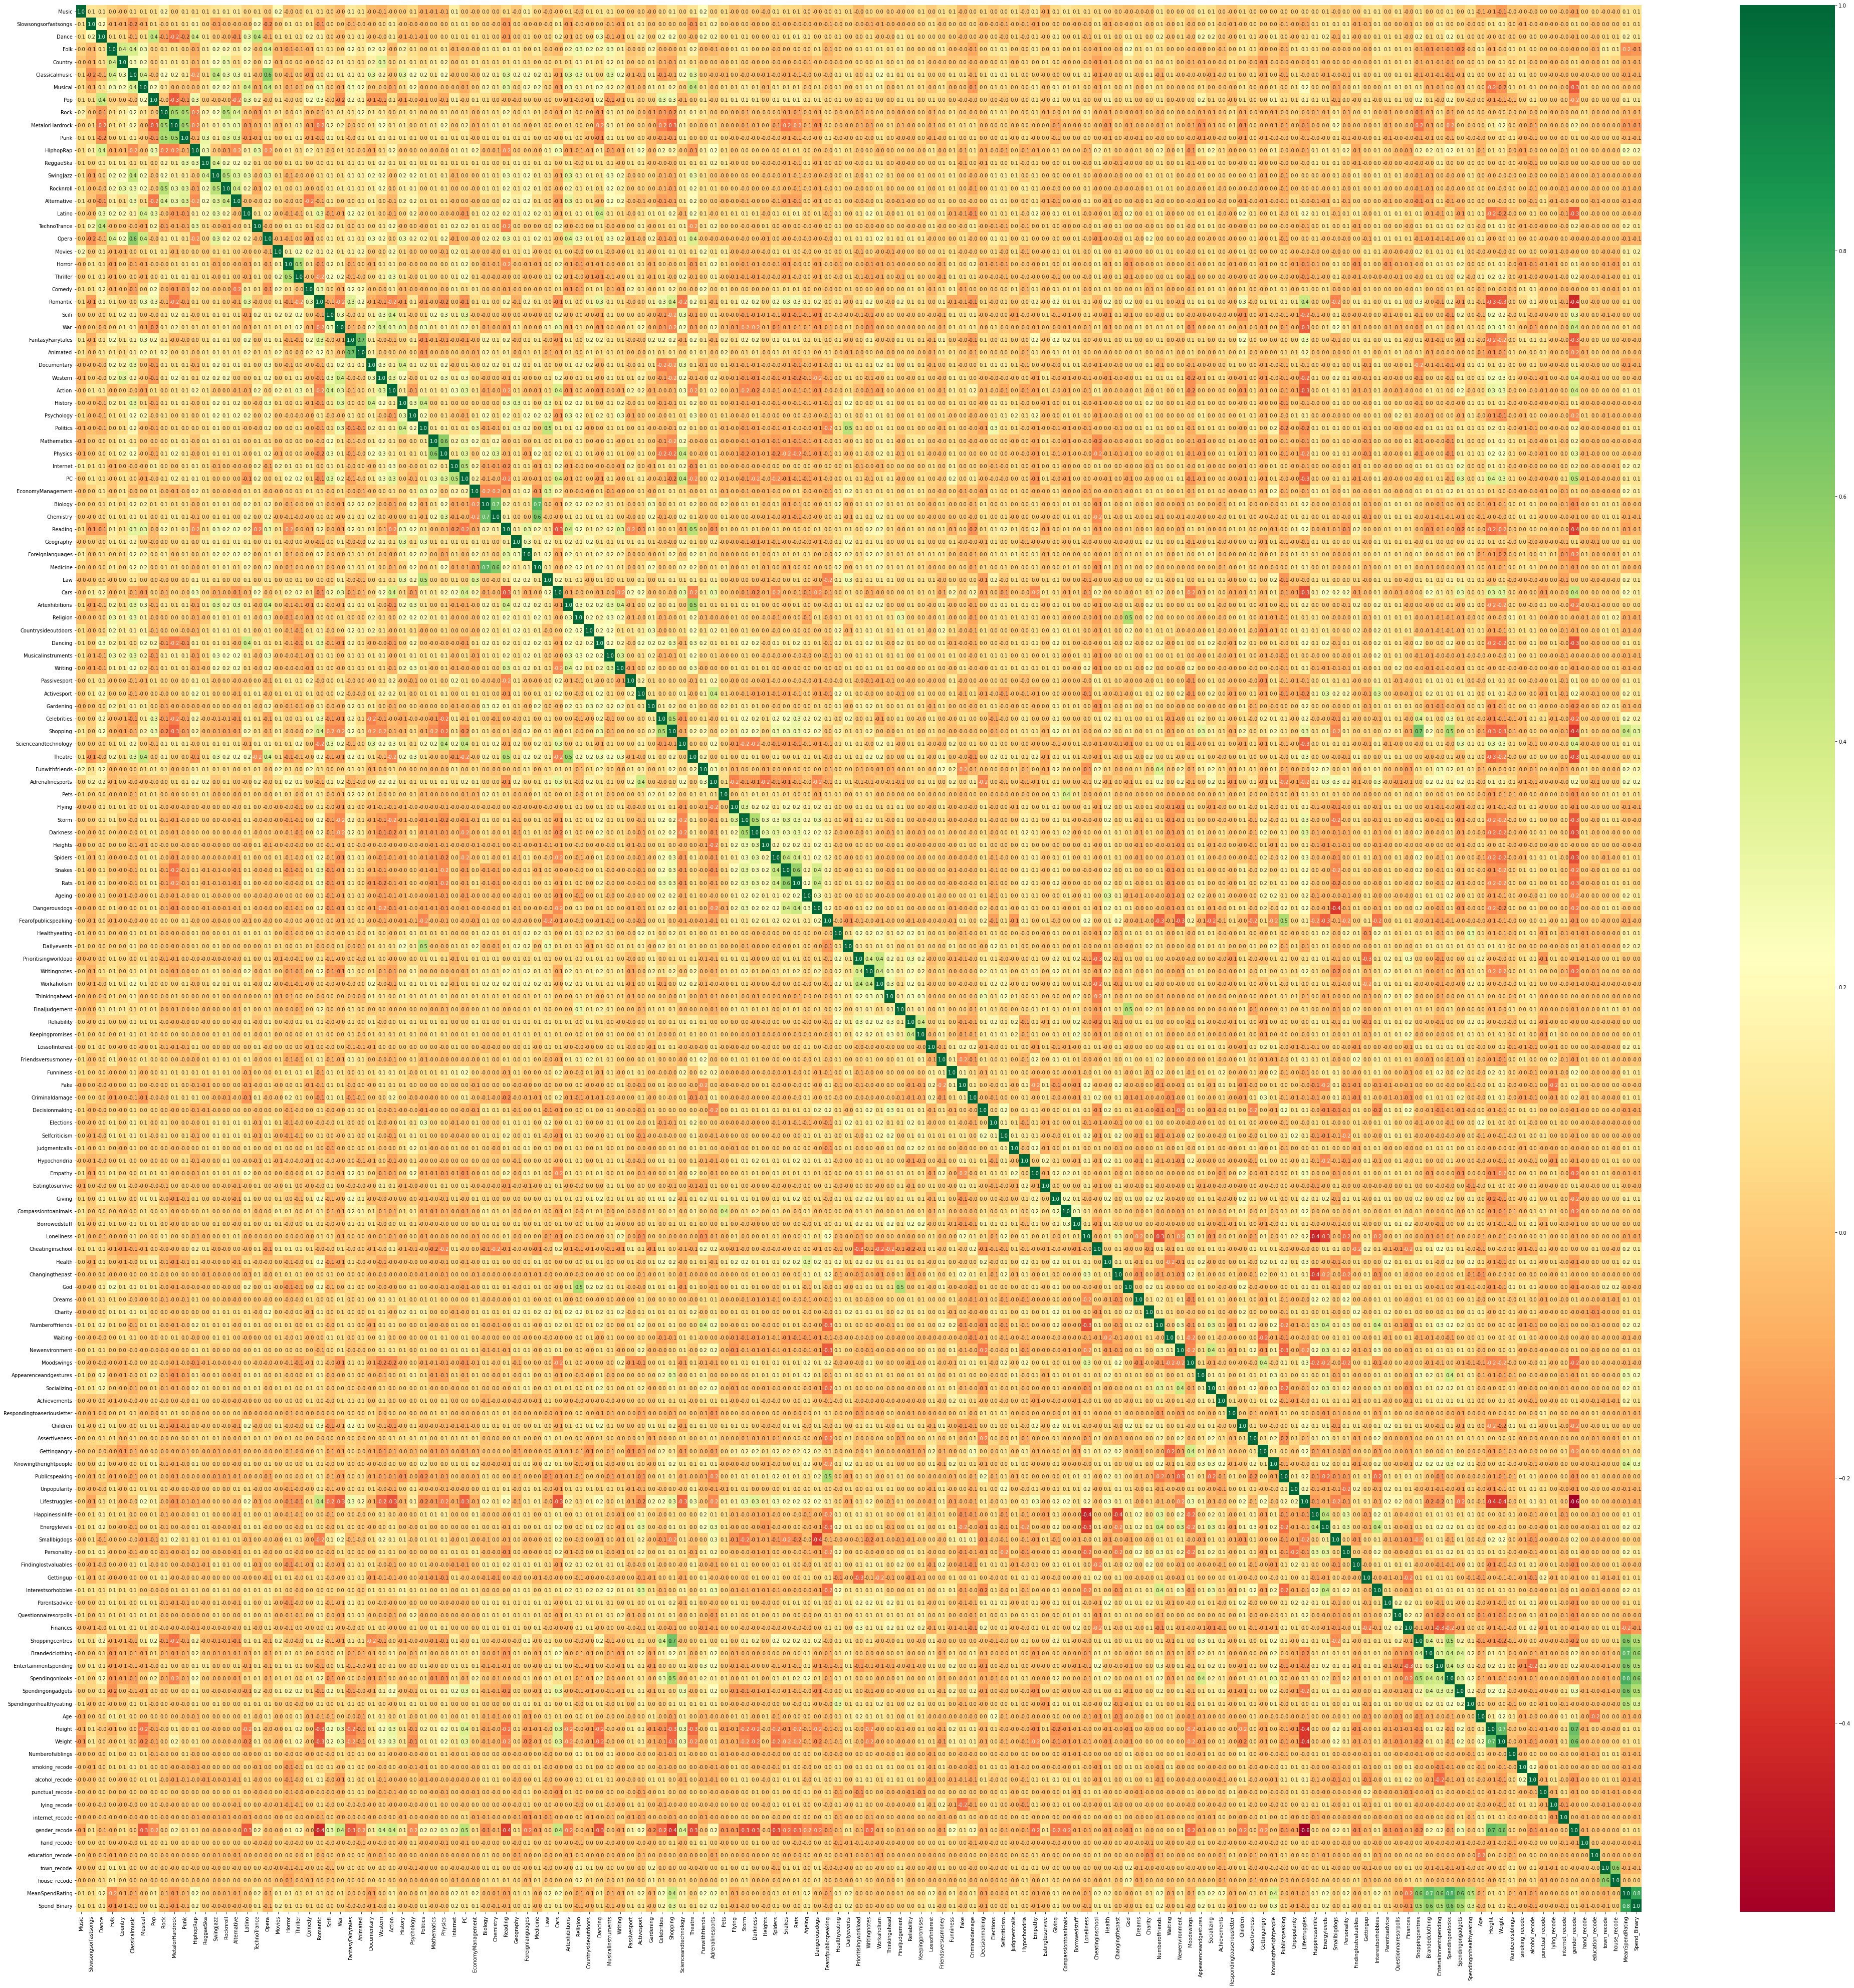

In [ ]:
fig, ax = plt.subplots(figsize=(70,70))  
corr_matrix = millenials.corr().round(3)
sns.heatmap(corr_matrix, annot=True, fmt='.1f',cmap='RdYlGn')

# Using the whole dataset

The final dataset is split equally between training and testing dataset, where training dataset will be used for the regression modelling and the results will be further validated on the test data.

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split

In [ ]:
X = millenials.drop(columns=[
'Shopping',
'Flying',
'Storm',
'Darkness',
'Heights',
'Spiders',
'Snakes',
'Rats',
'Ageing',
'Dangerousdogs',
'Fearofpublicspeaking',
'Finances',
'Shoppingcentres',
'Brandedclothing',
'Entertainmentspending',
'Spendingonlooks',
'Spendingongadgets',
'Spendingonhealthyeating',
'Leftrighthanded',
'Onlychild',
'MeanSpendRating',
'Spend_Binary',
])
y = millenials['Spend_Binary']

#train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.5, random_state=1)

In [ ]:
#train_X
#train_y

In [ ]:
display(X['Gender'].value_counts())
#print(train_X['Gender'].value_counts())

female    593
male      411
Name: Gender, dtype: int64

# Dimension Reduction using Factor Analysis

In [ ]:
# unsupervised machine learning algorithms used for dimensionality reduction
# it creates factors from the observed variables to represent the common variance i.e. variance due to correlation among the observed variables

# steps involved in factor analysis
# 1. Bartlett’s Test of Sphericity and KMO Test
# 2. Determining the number of factors
# 3. Interpreting the factors

In [ ]:
import sklearn.datasets
!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 487 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=246a38678a7c7f59b81122908bc6f678bcd6af9286f6a95c9f71714b4d68d203
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


# Factor Analysis: All Variables

In [ ]:
# All psychographic variables

In [ ]:
psych = X.iloc[:,0:122]
psych_df = psych.drop(columns=['Smoking','Alcohol','Punctuality','Lying','Internetusage'])
#personalities_df.head()

In [ ]:
psych_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 117 entries, Music to Questionnairesorpolls
dtypes: float64(114), int64(3)
memory usage: 923.3 KB


In [ ]:
from sklearn.preprocessing import StandardScaler
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [ ]:
#standardize the data

scaler = StandardScaler()

scaled_psych = psych_df
scaled_psych = pd.DataFrame(scaler.fit_transform(psych_df), columns=scaled_psych.columns)
#scaled_psych.info()

In [ ]:
matrix = scaled_psych.corr()
#matrix

In [ ]:
#CHECK ADEQUACY

#Bartlett
#p-value should be 0 (statistically sig.)
chi_square_value,p_value=calculate_bartlett_sphericity(matrix)
display('Chi-square: ', chi_square_value, 'P-Value: ', p_value)

#KMO
#Value should be 0.6<
kmo_all,kmo_model=calculate_kmo(matrix)
display('KMO: ', kmo_model)


'Chi-square: '

14392.60605665464

'P-Value: '

0.0

/usr/local/lib/python3.7/dist-packages/factor_analyzer/utils.py:249: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


'KMO: '

0.893632795537232

In [ ]:
#Create a Factor Analyzer variable and perform factor analysis: All psychographic variables
# methods:  principal, minres or ml (max likelihood)

In [ ]:
#initial FA without rotation

fa = FactorAnalyzer(n_factors = 36, method='principal', rotation=None)
fa.fit(scaled_psych)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:376: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  FutureWarning,


FactorAnalyzer(method='principal', n_factors=36, rotation=None,
               rotation_kwargs={})

In [ ]:
#checking cumulative variance (should be above 60%)

variance = pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var'])
variance

# The first row represents the variance explained by each factor
# Proportional variance is the variance explained by a factor out of the total variance
# Cumulative variance is nothing but the cumulative sum of proportional variances of each factor

0         1         2         3         4         5   \
Variance          7.975164  6.608730  5.522609  3.549196  3.453823  3.131738   
Proportional Var  0.068164  0.056485  0.047202  0.030335  0.029520  0.026767   
Cumulative Var    0.068164  0.124649  0.171850  0.202185  0.231705  0.258472   

                        6         7         8         9   ...        26  \
Variance          2.649324  2.407366  2.149176  1.992954  ...  1.126268   
Proportional Var  0.022644  0.020576  0.018369  0.017034  ...  0.009626   
Cumulative Var    0.281116  0.301692  0.320061  0.337095  ...  0.545445   

                        27        28        29        30        31        32  \
Variance          1.115000  1.080404  1.050186  1.015410  0.988627  0.987397   
Proportional Var  0.009530  0.009234  0.008976  0.008679  0.008450  0.008439   
Cumulative Var    0.554975  0.564209  0.573185  0.581864  0.590314  0.598753   

                        33        34        35  
Variance          0.961835  0.951405  0.928531  
Proportional Var  0.008221  0.008132  0.007936  
Cumulative Var    0.606974  0.615105  0.623042  

[3 rows x 36 columns]

array([7.97516438, 6.60872968, 5.5226094 , 3.54919607, 3.45382305,
       3.13173904, 2.64932755, 2.40737073, 2.14922855, 1.9930851 ,
       1.85662521, 1.84079575, 1.76085033, 1.72502694, 1.56824434,
       1.52818088, 1.47648996, 1.45085709, 1.40901096, 1.3094648 ,
       1.2975989 , 1.27097243, 1.24182967, 1.19806982, 1.19446411,
       1.16261094, 1.13523228, 1.12521721, 1.08858368, 1.06567426,
       1.03442764, 1.01976993, 1.00981795, 0.98831261, 0.97931753,
       0.96529441, 0.9380393 , 0.93454651, 0.92688171, 0.91398553,
       0.87941581, 0.87135796, 0.85847984, 0.84940798, 0.84301446,
       0.82691523, 0.80051235, 0.79297731, 0.78615551, 0.77731355,
       0.7665851 , 0.75481494, 0.743746  , 0.72512945, 0.72274419,
       0.71308663, 0.7044423 , 0.68713784, 0.67378622, 0.665703  ,
       0.6617787 , 0.65584568, 0.6459647 , 0.63164642, 0.61682342,
       0.61432635, 0.60526291, 0.59718927, 0.59366452, 0.57923426,
       0.57258036, 0.56232931, 0.558758  , 0.54918687, 0.53563

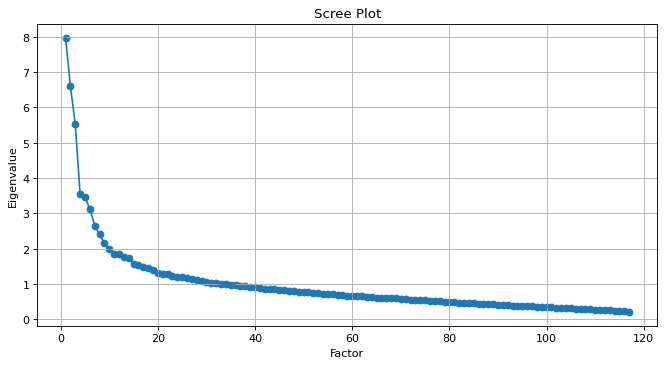

In [ ]:
#get the eigenvectors and eigenvalues
ev, v = fa.get_eigenvalues()
display(ev)

#do a scree plot

xvals = range(1,scaled_psych.shape[1]+1)
plt.figure(figsize=(10, 5), dpi=80)
plt.scatter(xvals,ev)
plt.plot(xvals, ev)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
#Get the communalities

communalities = pd.DataFrame(fa.get_communalities(),index=scaled_psych.columns,columns=['Communalities'])
#communalities


#check the communalities less than 0.3
low_comm = communalities[communalities['Communalities'] < 0.3] 
low_comm

Empty DataFrame
Columns: [Communalities]
Index: []

In [ ]:
#get the loadings
loadings = fa.loadings_

factors = pd.DataFrame(loadings,index=scaled_psych.columns)
with pd.ExcelWriter('loadings_allvar_Aug3.xlsx') as writer:  
    factors.to_excel(writer, sheet_name='PA_None')

##Extraction Method: MinRes, Rotation: Promax

In [ ]:
fa = FactorAnalyzer(n_factors = 36, method='minres', rotation='promax')
fa.fit(scaled_psych)

FactorAnalyzer(n_factors=36, rotation_kwargs={})

In [ ]:
#checking cumulative variance (should be above 60%)

variance = pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var'])
variance

# The first row represents the variance explained by each factor
# Proportional variance is the variance explained by a factor out of the total variance
# Cumulative variance is nothing but the cumulative sum of proportional variances of each factor

0         1         2         3         4         5   \
Variance          3.078996  2.787889  2.589664  2.525147  2.517478  2.312588   
Proportional Var  0.026316  0.023828  0.022134  0.021582  0.021517  0.019766   
Cumulative Var    0.026316  0.050144  0.072278  0.093861  0.115378  0.135143   

                        6         7         8         9   ...        26  \
Variance          2.248985  2.200422  2.158341  2.152488  ...  1.503173   
Proportional Var  0.019222  0.018807  0.018447  0.018397  ...  0.012848   
Cumulative Var    0.154365  0.173172  0.191620  0.210017  ...  0.464952   

                        27        28        29        30        31        32  \
Variance          1.479921  1.464853  1.459992  1.458056  1.419809  1.267122   
Proportional Var  0.012649  0.012520  0.012479  0.012462  0.012135  0.010830   
Cumulative Var    0.477601  0.490121  0.502600  0.515062  0.527197  0.538027   

                        33        34        35  
Variance          1.218427  1.051576  0.799595  
Proportional Var  0.010414  0.008988  0.006834  
Cumulative Var    0.548441  0.557429  0.564263  

[3 rows x 36 columns]

In [ ]:
#Get the communalities

communalities = pd.DataFrame(fa.get_communalities(),index=scaled_psych.columns,columns=['Communalities'])
with pd.ExcelWriter('communalities.xlsx') as writer:  
    communalities.to_excel(writer, sheet_name='communalities')


In [ ]:
#removing variables with low communalities
scaled_psych2= scaled_psych.drop(columns=['Music',
'Slowsongsorfastsongs',
'Comedy',
'Romantic',
'Psychology',
'Reading',
'Cars',
'Countrysideoutdoors',
'Musicalinstruments',
'Gardening',
'Celebrities',
'Healthyeating',
'Lossofinterest',
'Criminaldamage',
'Eatingtosurvive',
'Giving',
'Borrowedstuff',
'Cheatinginschool',
'Health',
'Dreams',
'Waiting',
'Achievements',
'Respondingtoaseriousletter',
'Children',
'Assertiveness',
'Publicspeaking',
'Lifestruggles',
'Personality',
'Gettingup',
'Questionnairesorpolls',])
#scaled_psych2

In [ ]:
fa.fit(scaled_psych2)

FactorAnalyzer(n_factors=36, rotation_kwargs={})

In [ ]:
#get the loadings
loadings = fa.loadings_

factors = pd.DataFrame(loadings,index=scaled_psych2.columns)
with pd.ExcelWriter('loadings_fulldata.xlsx') as writer:  
    factors.to_excel(writer, sheet_name='Minres_Promax')

In [ ]:
#removing items with no factor loading > 0.3 
scaled_psych3= scaled_psych2.drop(columns=[
'Alternative',
'Movies',
'Passivesport',
'Scienceandtechnology',
'Hypochondria',
'Smallbigdogs'])
#scaled_psych3

In [ ]:
fa.fit(scaled_psych3)

FactorAnalyzer(n_factors=36, rotation_kwargs={})

In [ ]:
#checking cumulative variance (should be above 60%)

variance = pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var'])
variance

# The first row represents the variance explained by each factor
# Proportional variance is the variance explained by a factor out of the total variance
# Cumulative variance is nothing but the cumulative sum of proportional variances of each factor

0         1         2         3         4         5   \
Variance          2.636465  2.216297  1.889436  1.829063  1.800603  1.787925   
Proportional Var  0.032549  0.027362  0.023326  0.022581  0.022230  0.022073   
Cumulative Var    0.032549  0.059911  0.083237  0.105818  0.128048  0.150121   

                        6         7         8         9   ...        26  \
Variance          1.714538  1.632441  1.588777  1.563057  ...  1.116873   
Proportional Var  0.021167  0.020154  0.019615  0.019297  ...  0.013789   
Cumulative Var    0.171288  0.191442  0.211056  0.230353  ...  0.502649   

                        27        28        29        30        31        32  \
Variance          1.084221  1.063652  1.059376  1.055963  1.027879  0.988858   
Proportional Var  0.013385  0.013132  0.013079  0.013037  0.012690  0.012208   
Cumulative Var    0.516034  0.529166  0.542244  0.555281  0.567971  0.580179   

                        33        34        35  
Variance          0.983178  0.892407  0.748835  
Proportional Var  0.012138  0.011017  0.009245  
Cumulative Var    0.592317  0.603334  0.612579  

[3 rows x 36 columns]

In [ ]:
#get the loadings
loadings = fa.loadings_

factors = pd.DataFrame(loadings,index=scaled_psych3.columns)
with pd.ExcelWriter('loadings_fulldata.xlsx',engine='openpyxl', mode='a') as writer:  
    factors.to_excel(writer, sheet_name='MinRes_PromaxV3')

In [ ]:
#running FA for 32 factors only, to reduce number of single-item factors

fa2 = FactorAnalyzer(n_factors = 32, method='minres', rotation='promax')
fa2.fit(scaled_psych3)

FactorAnalyzer(n_factors=32, rotation_kwargs={})

In [ ]:
variance = pd.DataFrame(fa2.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var'])
variance

0         1         2         3         4         5   \
Variance          2.415318  2.303593  2.112268  1.866284  1.862050  1.769535   
Proportional Var  0.029819  0.028439  0.026077  0.023041  0.022988  0.021846   
Cumulative Var    0.029819  0.058258  0.084336  0.107376  0.130364  0.152210   

                        6         7         8         9   ...        22  \
Variance          1.765240  1.704214  1.622951  1.554589  ...  1.129849   
Proportional Var  0.021793  0.021040  0.020036  0.019192  ...  0.013949   
Cumulative Var    0.174004  0.195043  0.215080  0.234272  ...  0.449794   

                        23        24        25        26        27        28  \
Variance          1.092618  1.082787  1.072473  1.065711  1.019679  0.979997   
Proportional Var  0.013489  0.013368  0.013240  0.013157  0.012589  0.012099   
Cumulative Var    0.463283  0.476650  0.489891  0.503048  0.515636  0.527735   

                        29        30        31  
Variance          0.963584  0.953878  0.905895  
Proportional Var  0.011896  0.011776  0.011184  
Cumulative Var    0.539631  0.551407  0.562591  

[3 rows x 32 columns]

In [ ]:
#get the loadings
loadings = fa2.loadings_

factors = pd.DataFrame(loadings,index=scaled_psych3.columns)
with pd.ExcelWriter('loadings_fulldata.xlsx',engine='openpyxl', mode='a') as writer:  
    factors.to_excel(writer, sheet_name='MinRes_PromaxV4')

# FA scores computation

In [ ]:
skim(millenials)

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                Data Types                                           │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                    │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                    │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                    │
│ │ Number of rows    │ 1010   │ │ float64     │ 136   │                                    │
│ │ Number of columns │ 162    │ │ int64       │ 15    │                                    │
│ └───────────────────┴────────┘ │ object      │ 11    │                                    │
│                                └─────────────┴───────┘                                    │
│                                          number                                           │
│ ┏━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━┳━━━━━┳━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃              ┃ missing ┃ complete     ┃ mean ┃ sd   ┃ p0 ┃ p25 ┃ p75 ┃ p100 ┃ hist   ┃  │
│ ┃              ┃         ┃ rate         ┃      ┃      ┃    ┃     ┃     ┃      ┃        ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━╇━━━━━╇━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ Music        │       3 │            1 │  4.7 │ 0.66 │  1 │   5 │   5 │    5 │     ▁█ │  │
│ │ Slowsongsorf │       2 │            1 │  3.3 │ 0.83 │  1 │   3 │   4 │    5 │  ▁ █▃▁ │  │
│ │ astsongs     │         │              │      │      │    │     │     │      │        │  │
│ │ Dance        │       4 │            1 │  3.1 │  1.2 │  1 │   2 │   4 │    5 │ ▂▅ █▆▄ │  │
│ │ Folk         │       5 │            1 │  2.3 │  1.1 │  1 │   1 │   3 │    5 │ ▇█ ▆▂▁ │  │
│ │ Country      │       5 │            1 │  2.1 │  1.1 │  1 │   1 │   3 │    5 │ ██ ▅▂▁ │  │
│ │ Classicalmus │       7 │         0.99 │    3 │  1.3 │  1 │   2 │   4 │    5 │ ▄▇ █▅▄ │  │
│ │ ic           │         │              │      │      │    │     │     │      │        │  │
│ │ Musical      │       2 │            1 │  2.8 │  1.3 │  1 │   2 │   4 │    5 │ ▆▇ █▅▃ │  │
│ │ Pop          │       3 │            1 │  3.5 │  1.2 │  1 │   3 │   4 │    5 │ ▂▄ ▇█▆ │  │
│ │ Rock         │       6 │         0.99 │  3.8 │  1.2 │  1 │   3 │   5 │    5 │ ▁▂ ▅▇█ │  │
│ │ MetalorHardr │       3 │            1 │  2.4 │  1.4 │  1 │   1 │   3 │    5 │ █▅ ▃▃▂ │  │
│ │ ock          │         │              │      │      │    │     │     │      │        │  │
│ │ Punk         │       8 │         0.99 │  2.5 │  1.3 │  1 │   1 │   3 │    5 │ █▆ ▆▄▂ │  │
│ │ HiphopRap    │       4 │            1 │  2.9 │  1.4 │  1 │   2 │   4 │    5 │ █▇ ▇█▆ │  │
│ │ ReggaeSka    │       7 │         0.99 │  2.8 │  1.2 │  1 │   2 │   4 │    5 │ ▅▇ █▅▃ │  │
│ │ SwingJazz    │       6 │         0.99 │  2.8 │  1.3 │  1 │   2 │   4 │    5 │ ▆▇ █▆▃ │  │
│ │ Rocknroll    │       7 │         0.99 │  3.1 │  1.2 │  1 │   2 │   4 │    5 │ ▃▅ █▆▄ │  │
│ │ Alternative  │       7 │         0.99 │  2.8 │  1.3 │  1 │   2 │   4 │    5 │ ▇▇ █▆▅ │  │
│ │ Latino       │       8 │         0.99 │  2.8 │  1.3 │  1 │   2 │   4 │    5 │ ▆█ █▆▅ │  │
│ │ TechnoTrance │       7 │         0.99 │  2.3 │  1.3 │  1 │   1 │   3 │    5 │ █▄ ▄▃▂ │  │
│ │ Opera        │       1 │            1 │  2.1 │  1.2 │  1 │   1 │   3 │    5 │ █▆ ▄▂▁ │  │
│ │ Movies       │       6 │         0.99 │  4.6 │ 0.69 │  1 │   4 │   5 │    5 │    ▁▂█ │  │
│ │ Horror       │       2 │            1 │  2.8 │  1.4 │  1 │   1 │   4 │    5 │ █▆ ▇▆▅ │  │
│ │ Thriller     │       1 │            1 │  3.4 │  1.2 │  1 │   3 │   4 │    5 │ ▂▄ ▆█▅ │  │
│ │ Comedy       │       3 │            1 │  4.5 │ 0.78 │  1 │   4 │   5 │    5 │    ▁▃█ │  │
│ │ Romantic     │       3 │            1 │  3.5 │  1.2 │  1 │   3 │   5 │    5 │ ▂▅ █▇█ │  │
│ │ Scifi        │       2 │            1 │  3.1 │  1.3 │  1 │   2 │   4 │    5 │ ▄▇ █▇▆ │  │
│ │ War          │       2 │            1 │  3.2 │  

In [ ]:
millenials['Loneliness'].value_counts()

3.0    359
2.0    265
4.0    167
1.0    113
5.0    105
Name: Loneliness, dtype: int64

In [ ]:
millenials['Changingthepast'].value_counts()

3.0    296
2.0    214
4.0    186
1.0    161
5.0    151
Name: Changingthepast, dtype: int64

In [ ]:
millenials2 = millenials

In [ ]:
old = [1,2,3,4,5]
new = [5,4,3,2,1]

millenials2['Loneliness'] = millenials['Loneliness'].replace(old, new)
millenials2['Changingthepast'] = millenials['Changingthepast'].replace(old, new)

In [ ]:
millenials2['Loneliness'].value_counts()

3.0    359
4.0    265
2.0    167
5.0    113
1.0    105
Name: Loneliness, dtype: int64

In [ ]:
millenials2['Changingthepast'].value_counts()

3.0    296
4.0    214
2.0    186
5.0    161
1.0    151
Name: Changingthepast, dtype: int64

In [ ]:
##cap and floor Height and Weight variables
millenials2['Height'] = np.where(millenials2['Height'] < 148,148,millenials2['Height'])
millenials2['Weight'] = np.where(millenials2['Weight'] < 43,43,millenials2['Weight'])
millenials2['Weight'] = np.where(millenials2['Weight'] > 100,100,millenials2['Weight'])

In [ ]:
#recode Education
millenials2['Education'] = millenials2['Education'].map({"college/bachelor degree": "college/bachelor degree", 
       "currently a primary school pupil": "Primary school",
       "primary school": "Primary school",
       "doctorate degree": "post-grad",
       "masters degree": "post-grad",
       "secondary school": "secondary school"})

In [ ]:
#recode Internet usage
millenials2['Internetusage'] = millenials2['Internetusage'].map(
    {
    "few hours a day": "few hours a day",
    "less than an hour a day":"less than an hour a day",
    "most of the day": "most of the day",
    "no time at all":"less than an hour a day"
    })

In [ ]:
#recode Smoker/Non-Smoker
millenials2['Smoking'] = millenials2['Smoking'].map(
    {
    "current smoker": "smoker",
    "former smoker" : "smoker",
    "never smoked"  : "non-smoker",
    "tried smoking" : "non-smoker"
    })

In [ ]:
#imputing numeric variables with mean 
c = millenials2.select_dtypes(np.number).columns
millenials2[c] = millenials2[c].fillna(millenials2[c].mean())

In [ ]:
#imputing categorical variables with mode (use original categorical variables for ease of generating dummy for regression)
millenials2['Smoking']=millenials2['Smoking'].fillna(millenials2['Smoking'].mode()[0])
millenials2['Alcohol']=millenials2['Alcohol'].fillna(millenials2['Alcohol'].mode()[0])
millenials2['Punctuality']=millenials2['Punctuality'].fillna(millenials2['Punctuality'].mode()[0])
millenials2['Lying']=millenials2['Lying'].fillna(millenials2['Lying'].mode()[0])
millenials2['Internetusage']=millenials2['Internetusage'].fillna(millenials2['Internetusage'].mode()[0])
millenials2['Gender']=millenials2['Gender'].fillna(millenials2['Gender'].mode()[0])
millenials2['Education']=millenials2['Education'].fillna(millenials2['Education'].mode()[0])
millenials2['Villagetown']=millenials2['Villagetown'].fillna(millenials2['Villagetown'].mode()[0])
millenials2['Houseblockofflats']=millenials2['Houseblockofflats'].fillna(millenials2['Houseblockofflats'].mode()[0])

In [ ]:
#Factor scores computation using mean 
millenials2['Art']=(millenials2['Musical']+millenials2['Artexhibitions']+millenials2['Theatre']+millenials2['Opera']+millenials2['Writing']+millenials2['Classicalmusic'])/6
millenials2['Sciences']=(millenials2['Medicine']+millenials2['Biology']+millenials2['Chemistry'])/3
millenials2['RockMusic']=(millenials2['Rock']+millenials2['MetalorHardrock']+millenials2['Punk'])/3
millenials2['Happiness']=(millenials2['Energylevels']+millenials2['Loneliness']+millenials2['Changingthepast']+millenials2['Happinessinlife'])/4
millenials2['Educational']=(millenials2['Documentary']+millenials2['History'])/2
millenials2['Spritualbeliefs']=(millenials2['God']+millenials2['Finaljudgement']+millenials2['Religion'])/3
millenials2['Physicalactivity']=(millenials2['Activesport']+millenials2['Interestsorhobbies']+millenials2['Adrenalinesports'])/3
millenials2['PopLatino']=(millenials2['Latino']+millenials2['Pop'])/2
millenials2['Countrymusic']=(millenials2['Country']+millenials2['Folk'])/2
millenials2['Socialawareness']=(millenials2['Law']+millenials2['EconomyManagement'])/2
millenials2['Computertechnology']=(millenials2['Internet']+millenials2['PC'])/2
millenials2['Fantasy']=(millenials2['FantasyFairytales']+millenials2['Animated'])/2
millenials2['Extrovert']=(millenials2['Socializing']+millenials2['Newenvironment'])/2
millenials2['ThrillerHorror']=(millenials2['Thriller']+millenials2['Horror'])/2
millenials2['Upbeatmusic']=(millenials2['Dance']+millenials2['TechnoTrance']+millenials2['Dancing'])/3
millenials2['Rnb']=(millenials2['SwingJazz']+millenials2['Rocknroll'])/2
millenials2['Diligence']=(millenials2['Writingnotes']+millenials2['Prioritisingworkload']+millenials2['Workaholism'])/3
millenials2['MathAndPhysics']=(millenials2['Physics']+millenials2['Mathematics'])/2
millenials2['HipMusic']=(millenials2['ReggaeSka']+millenials2['HiphopRap'])/2
millenials2['Trendy']=(millenials2['Appearenceandgestures']+millenials2['Dailyevents']+millenials2['Knowingtherightpeople'])/3
millenials2['Friendliness']=(millenials2['Funwithfriends']+millenials['Friendsversusmoney']+millenials2['Numberoffriends'])/3
millenials2['Trustworthiness']=(millenials2['Keepingpromises']+millenials2['Reliability'])/2
millenials2['Loveforanimals']=(millenials2['Compassiontoanimals']+millenials2['Pets'])/3
millenials2['Irritability']=(millenials2['Moodswings']+millenials2['Gettingangry'])/2
millenials2['Pretentiousness']=(millenials2['Fake']+millenials2['Funniness'])/2
millenials2['Conscientiousness']=(millenials2['Selfcriticism']+millenials2['Thinkingahead']+millenials2['Decisionmaking'])/3
millenials2['WesternWarFilms']=(millenials2['War']+millenials2['Western'])/2
millenials2['ScifiActionMovie']=(millenials2['Action']+millenials2['Scifi'])/2
millenials2['Righteousness']=(millenials2['Unpopularity']+millenials2['Parentsadvice']+millenials2['Findinglostvaluables'])/3
millenials2['PoliticalAwareness']=(millenials2['Politics']+millenials2['Elections'])/2
millenials2['LanguageGeography']=(millenials2['Geography']+millenials2['Foreignlanguages'])/2
millenials2['Empathy2']=(millenials2['Judgmentcalls']+millenials2['Empathy']+millenials2['Charity'])/3


In [ ]:
millenials2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 194 entries, Music to Empathy2
dtypes: float64(168), int64(15), object(11)
memory usage: 1.5+ MB


In [ ]:
skim(millenials2)

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                Data Types                                           │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                    │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                    │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                    │
│ │ Number of rows    │ 1010   │ │ float64     │ 168   │                                    │
│ │ Number of columns │ 194    │ │ int64       │ 15    │                                    │
│ └───────────────────┴────────┘ │ object      │ 11    │                                    │
│                                └─────────────┴───────┘                                    │
│                                          number                                           │
│ ┏━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━┳━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃             ┃ missing ┃ complete    ┃ mean ┃ sd   ┃ p0   ┃ p25 ┃ p75 ┃ p100 ┃ hist   ┃  │
│ ┃             ┃         ┃ rate        ┃      ┃      ┃      ┃     ┃     ┃      ┃        ┃  │
│ ┡━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━╇━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ Music       │       0 │           1 │  4.7 │ 0.66 │    1 │   5 │   5 │    5 │     ▁█ │  │
│ │ Slowsongsor │       0 │           1 │  3.3 │ 0.83 │    1 │   3 │   4 │    5 │  ▁ █▃▁ │  │
│ │ fastsongs   │         │             │      │      │      │     │     │      │        │  │
│ │ Dance       │       0 │           1 │  3.1 │  1.2 │    1 │   2 │   4 │    5 │ ▂▅ █▆▃ │  │
│ │ Folk        │       0 │           1 │  2.3 │  1.1 │    1 │   1 │   3 │    5 │ ▇█ ▆▂▁ │  │
│ │ Country     │       0 │           1 │  2.1 │  1.1 │    1 │   1 │   3 │    5 │ ██ ▅▂▁ │  │
│ │ Classicalmu │       0 │           1 │    3 │  1.2 │    1 │   2 │   4 │    5 │ ▄▇ █▅▄ │  │
│ │ sic         │         │             │      │      │      │     │     │      │        │  │
│ │ Musical     │       0 │           1 │  2.8 │  1.3 │    1 │   2 │   4 │    5 │ ▆▇ █▅▃ │  │
│ │ Pop         │       0 │           1 │  3.5 │  1.2 │    1 │   3 │   4 │    5 │ ▂▄ ▇█▆ │  │
│ │ Rock        │       0 │           1 │  3.8 │  1.2 │    1 │   3 │   5 │    5 │ ▁▂ ▅▇█ │  │
│ │ MetalorHard │       0 │           1 │  2.4 │  1.4 │    1 │   1 │   3 │    5 │ █▅ ▃▃▂ │  │
│ │ rock        │         │             │      │      │      │     │     │      │        │  │
│ │ Punk        │       0 │           1 │  2.5 │  1.3 │    1 │   1 │   3 │    5 │ █▆ ▆▄▂ │  │
│ │ HiphopRap   │       0 │           1 │  2.9 │  1.4 │    1 │   2 │   4 │    5 │ █▇ ▇█▆ │  │
│ │ ReggaeSka   │       0 │           1 │  2.8 │  1.2 │    1 │   2 │   4 │    5 │ ▅▇ █▅▃ │  │
│ │ SwingJazz   │       0 │           1 │  2.8 │  1.3 │    1 │   2 │   4 │    5 │ ▆▇ █▆▃ │  │
│ │ Rocknroll   │       0 │           1 │  3.1 │  1.2 │    1 │   2 │   4 │    5 │ ▃▅ █▆▄ │  │
│ │ Alternative │       0 │           1 │  2.8 │  1.3 │    1 │   2 │   4 │    5 │ ▇▇ █▆▅ │  │
│ │ Latino      │       0 │           1 │  2.8 │  1.3 │    1 │   2 │   4 │    5 │ ▆█ █▆▅ │  │
│ │ TechnoTranc │       0 │           1 │  2.3 │  1.3 │    1 │   1 │   3 │    5 │ █▄ ▄▃▂ │  │
│ │ e           │         │             │      │      │      │     │     │      │        │  │
│ │ Opera       │       0 │           1 │  2.1 │  1.2 │    1 │   1 │   3 │    5 │ █▆ ▄▂▁ │  │
│ │ Movies      │       0 │           1 │  4.6 │ 0.69 │    1 │   4 │   5 │    5 │    ▁▂█ │  │
│ │ Horror      │       0 │           1 │  2.8 │  1.4 │    1 │   1 │   4 │    5 │ █▆ ▇▆▅ │  │
│ │ Thriller    │       0 │           1 │  3.4 │  1.2 │    1 │   3 │   4 │    5 │ ▂▄ ▆█▅ │  │
│ │ Comedy      │       0 │           1 │  4.5 │ 0.78 │    1 │   4 │   5 │    5 │    ▁▃█ │  │
│ │ Romantic    │       0 │           1 │  3.5 │  1.2 │    1 │   3 │   5 │    5 │ ▂▅ █▇█ │  │
│ │ Scifi       │       0 │           1 │  3.1 │  1.

In [ ]:
with pd.ExcelWriter('millennialstest.xlsx') as writer:  
    millenials2.to_excel(writer, sheet_name='millennials')

# Checking Reliability of Factors

In [ ]:
Art = millenials2[['Musical','Artexhibitions','Theatre','Opera','Writing','Classicalmusic']]
Sciences = millenials2[['Medicine','Biology','Chemistry']]
RockMusic = millenials2[['Rock','MetalorHardrock','Punk']]
Happines = millenials2[['Energylevels', 'Loneliness', 'Changingthepast','Happinessinlife']]
Educational = millenials2[['Documentary', 'History']]
Spritualbeliefs = millenials2[['God', 'Finaljudgement', 'Religion']]
Physicalactivity = millenials2[['Activesport', 'Interestsorhobbies', 'Adrenalinesports']]
PopLatino = millenials2[['Latino','Pop']]
Countrymusic = millenials2[['Country', 'Folk']]
Socialawareness = millenials2[['Law', 'EconomyManagement']]
Computertechnology = millenials2[['Internet', 'PC']]
Fantasy = millenials2[['FantasyFairytales', 'Animated']]
Extrovert = millenials2[['Socializing', 'Newenvironment']]
ThrillerHorror = millenials2[['Thriller', 'Horror']]
Upbeatmusic = millenials2[['Dance', 'TechnoTrance', 'Dancing']]
Rnb = millenials2[['SwingJazz', 'Rocknroll']]
Diligence = millenials2[['Writingnotes', 'Prioritisingworkload', 'Workaholism']]
MathAndPhysics = millenials2[['Physics', 'Mathematics']]
HipMusic = millenials2[['ReggaeSka', 'HiphopRap']]
Trend = millenials2[['Appearenceandgestures', 'Dailyevents', 'Knowingtherightpeople']]
Friendliness = millenials2[['Funwithfriends', 'Friendsversusmoney', 'Numberoffriends']]
Trustworthiness = millenials2[['Keepingpromises', 'Reliability']]
LoveforAnimals = millenials2[['Compassiontoanimals', 'Pets']]
Irritability = millenials2[['Moodswings', 'Gettingangry']]
Pretentiousness = millenials2[['Fake', 'Funniness']]
Conscientiousness = millenials2[['Selfcriticism', 'Thinkingahead', 'Decisionmaking']]
WesternWarFilms = millenials2[['War', 'Western']]
ScifiActionMovie = millenials2[['Action', 'Scifi']]
Righteousness = millenials2[['Unpopularity', 'Parentsadvice', 'Findinglostvaluables']]
PoliticalAwareness = millenials2[['Politics', 'Elections']]
LanguageGeography = millenials2[['Geography', 'Foreignlanguages']]
Empathy = millenials2[['Judgmentcalls', 'Empathy', 'Charity']]

In [ ]:
!pip install pingouin
import pingouin as pg

In [ ]:
#Get cronbach alpha
#Cronbach alpha can be used to measure whether or not the variables of a factor form a "coherent" and reliable factor
#acceptable range? (0.61 and above)
factor1_alpha = pg.cronbach_alpha(Art)
factor2_alpha = pg.cronbach_alpha(Sciences)
factor3_alpha = pg.cronbach_alpha(RockMusic)
factor4_alpha = pg.cronbach_alpha(Happines)
factor5_alpha = pg.cronbach_alpha(Educational)
factor6_alpha = pg.cronbach_alpha(Spritualbeliefs)
factor7_alpha = pg.cronbach_alpha(Physicalactivity)
factor8_alpha = pg.cronbach_alpha(PopLatino)
factor9_alpha = pg.cronbach_alpha(Countrymusic)
factor10_alpha = pg.cronbach_alpha(Socialawareness)
factor11_alpha = pg.cronbach_alpha(Computertechnology)
factor12_alpha = pg.cronbach_alpha(Fantasy)
factor13_alpha = pg.cronbach_alpha(Extrovert)
factor14_alpha = pg.cronbach_alpha(ThrillerHorror)
factor15_alpha = pg.cronbach_alpha(Upbeatmusic)
factor16_alpha = pg.cronbach_alpha(Rnb)
factor17_alpha = pg.cronbach_alpha(Diligence)
factor18_alpha = pg.cronbach_alpha(MathAndPhysics)
factor19_alpha = pg.cronbach_alpha(HipMusic)
factor20_alpha = pg.cronbach_alpha(Trend)
factor21_alpha = pg.cronbach_alpha(Friendliness)
factor22_alpha = pg.cronbach_alpha(Trustworthiness)
factor23_alpha = pg.cronbach_alpha(LoveforAnimals)
factor24_alpha = pg.cronbach_alpha(Irritability)
factor25_alpha = pg.cronbach_alpha(Pretentiousness)
factor26_alpha = pg.cronbach_alpha(Conscientiousness)
factor27_alpha = pg.cronbach_alpha(WesternWarFilms)
factor28_alpha = pg.cronbach_alpha(ScifiActionMovie)
factor29_alpha = pg.cronbach_alpha(Righteousness)
factor30_alpha = pg.cronbach_alpha(PoliticalAwareness)
factor31_alpha = pg.cronbach_alpha(LanguageGeography)
factor32_alpha = pg.cronbach_alpha(Empathy)


In [ ]:
print('Art: ', factor1_alpha)
print('Sciences: ', factor2_alpha)
print('RockMusic: ', factor3_alpha)
print('Happines: ', factor4_alpha)
print('Educational: ', factor5_alpha)
print('Spritualbeliefs: ', factor6_alpha)
print('Physicalactivity: ', factor7_alpha)
print('PopLatino: ', factor8_alpha)
print('Countrymusic: ', factor9_alpha)
print('Socialawareness: ', factor10_alpha)
print('Computertechnology: ', factor11_alpha)
print('Fantasy: ', factor12_alpha)
print('Extrovert: ', factor13_alpha)
print('ThrillerHorror: ', factor14_alpha)
print('Upbeatmusic: ', factor15_alpha)
print('Rnb: ', factor16_alpha)
print('Diligence: ', factor17_alpha)
print('MathAndPhysics: ', factor18_alpha)
print('HipMusic: ', factor19_alpha)
print('Trend: ', factor20_alpha)
print('Friendliness: ', factor21_alpha)
print('Trustworthiness: ', factor22_alpha)
print('LoveforAnimals: ', factor23_alpha)
print('Irritability: ', factor24_alpha)
print('Pretentiousness: ', factor25_alpha)
print('Conscientiousness: ', factor26_alpha)
print('WesternWarFilms: ', factor27_alpha)
print('ScifiActionMovie: ', factor28_alpha)
print('Righteousness: ', factor29_alpha)
print('PoliticalAwareness: ', factor30_alpha)
print('LanguageGeography: ', factor31_alpha)
print('Empathy: ', factor32_alpha)



Art:  (0.7564934207053509, array([0.732, 0.779]))
Sciences:  (0.8592800321961902, array([0.844, 0.874]))
RockMusic:  (0.7657404658203771, array([0.74, 0.79]))
Happines:  (-0.48528411699574114, array([-0.641, -0.341]))
Educational:  (0.5336137216254808, array([0.472, 0.588]))
Spritualbeliefs:  (0.6944935937718831, array([0.66 , 0.726]))
Physicalactivity:  (0.6080406369685207, array([0.564, 0.648]))
PopLatino:  (0.4563579733005212, array([0.385, 0.52 ]))
Countrymusic:  (0.5555046578569167, array([0.497, 0.607]))
Socialawareness:  (0.507836695291118, array([0.443, 0.565]))
Computertechnology:  (0.6098391534909158, array([0.559, 0.655]))
Fantasy:  (0.8047543662697545, array([0.779, 0.827]))
Extrovert:  (0.5797169789054946, array([0.524, 0.629]))
ThrillerHorror:  (0.6655557671193637, array([0.622, 0.704]))
Upbeatmusic:  (0.4999540427319836, array([0.444, 0.551]))
Rnb:  (0.63566420628853, array([0.588, 0.678]))
Diligence:  (0.6615713243664504, array([0.624, 0.696]))
MathAndPhysics:  (0.74253

# Data Partition

In [ ]:
#removing Sciences, MathAndPhysics, LanguageGeography, and Finances
#removing RockMusic, PopLatino, 'Countrymusic', 'Fantasy','ThrillerHorror', 'Upbeatmusic',HipMusic','WesternWarFilms',	'ScifiActionMovie', 'Rnb'
#removing Lying
#removing Punctuality
#removing Educational

In [ ]:
millenials_df = millenials2[['Art','Happiness','Spritualbeliefs','Physicalactivity', 'Socialawareness',	'Computertechnology',	
                             'Extrovert',	'Diligence', 'Trendy', 'Friendliness', 'Trustworthiness',	'Loveforanimals', 'Irritability',	'Pretentiousness',
                             'Conscientiousness',	'Righteousness', 'PoliticalAwareness', 'Empathy2', 'Age','Height','Weight',	'Numberofsiblings',
                             'Smoking',	'Alcohol',	'Internetusage','Gender', 'Education', 'Villagetown','Houseblockofflats','Spend_Binary']]

In [ ]:
millenials_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Art                 1010 non-null   float64
 1   Happiness           1010 non-null   float64
 2   Spritualbeliefs     1010 non-null   float64
 3   Physicalactivity    1010 non-null   float64
 4   Socialawareness     1010 non-null   float64
 5   Computertechnology  1010 non-null   float64
 6   Extrovert           1010 non-null   float64
 7   Diligence           1010 non-null   float64
 8   Trendy              1010 non-null   float64
 9   Friendliness        1010 non-null   float64
 10  Trustworthiness     1010 non-null   float64
 11  Loveforanimals      1010 non-null   float64
 12  Irritability        1010 non-null   float64
 13  Pretentiousness     1010 non-null   float64
 14  Conscientiousness   1010 non-null   float64
 15  Righteousness       1010 non-null   float64
 16  Politi

In [ ]:
excluded_columns = 'Spend_Binary'
outcome = 'Spend_Binary'
predictors = [s for s in millenials_df.columns if s not in excluded_columns]

In [ ]:
#converting categorical variables to dummy variables
X = pd.get_dummies(millenials_df[predictors], drop_first=True)
y = millenials_df[outcome]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Art                                    1010 non-null   float64
 1   Happiness                              1010 non-null   float64
 2   Spritualbeliefs                        1010 non-null   float64
 3   Physicalactivity                       1010 non-null   float64
 4   Socialawareness                        1010 non-null   float64
 5   Computertechnology                     1010 non-null   float64
 6   Extrovert                              1010 non-null   float64
 7   Diligence                              1010 non-null   float64
 8   Trendy                                 1010 non-null   float64
 9   Friendliness                           1010 non-null   float64
 10  Trustworthiness                        1010 non-null   float64
 11  Love

In [ ]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.5, random_state=1)

display(train_X.shape)
display(train_y.shape)
display(valid_X.shape)
display(valid_y.shape)

(505, 33)

(505,)

(505, 33)

(505,)

# Full Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc

!pip install dmba
from dmba import classificationSummary, gainsChart, liftChart

!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 5.5 MB/s 
no display found. Using non-interactive Agg backend
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
millenial_logitreg = LogisticRegression(solver='liblinear', C=1e42, random_state=1)
millenial_logitreg.fit(train_X, train_y)

LogisticRegression(C=1e+42, random_state=1, solver='liblinear')

In [ ]:
millenial_logitreg.intercept_
print(millenial_logitreg.intercept_)

millenial_logitreg.coef_

[-10.11774669]


array([[ 8.63511912e-02,  3.33644152e-01, -1.84858565e-02,
         3.10614070e-01,  2.77670856e-01,  1.59336116e-02,
        -1.90510296e-02, -1.57701234e-01,  8.21873827e-01,
        -6.34788198e-02,  2.55783215e-01,  4.61333173e-01,
         8.33893774e-02,  2.06947839e-01, -3.29283076e-03,
         9.22406485e-02, -1.36755067e-01, -2.34776136e-02,
        -7.66397886e-02,  2.49840297e-02, -5.75803905e-04,
        -1.00455736e-01,  1.33575857e-01, -6.15779230e-01,
        -1.42935925e-01, -5.61504428e-01,  5.58752353e-01,
        -1.38394206e-02, -2.82709397e-01, -6.33751235e-02,
        -7.28181945e-02, -3.30453728e-01,  4.13522949e-01]])

In [ ]:
display('intercept', millenial_logitreg.intercept_)
#display(pd.DataFrame({'coef': millenial_logitreg.coef_[0], 'odds': np.e**millenial_logitreg.coef_[0]}, index=X.columns))

full = pd.DataFrame({'coef': millenial_logitreg.coef_[0], 'odds': np.e**millenial_logitreg.coef_[0]}, index=X.columns)
full 

'intercept'

array([-10.11774669])

coef      odds
Art                                    0.086351  1.090189
Happiness                              0.333644  1.396046
Spritualbeliefs                       -0.018486  0.981684
Physicalactivity                       0.310614  1.364263
Socialawareness                        0.277671  1.320052
Computertechnology                     0.015934  1.016061
Extrovert                             -0.019051  0.981129
Diligence                             -0.157701  0.854105
Trendy                                 0.821874  2.274758
Friendliness                          -0.063479  0.938494
Trustworthiness                        0.255783  1.291473
Loveforanimals                         0.461333  1.586187
Irritability                           0.083389  1.086965
Pretentiousness                        0.206948  1.229918
Conscientiousness                     -0.003293  0.996713
Righteousness                          0.092241  1.096629
PoliticalAwareness                    -0.136755  0.872184
Empathy2                              -0.023478  0.976796
Age                                   -0.076640  0.926223
Height                                 0.024984  1.025299
Weight                                -0.000576  0.999424
Numberofsiblings                      -0.100456  0.904425
Smoking_smoker                         0.133576  1.142908
Alcohol_never                         -0.615779  0.540220
Alcohol_social drinker                -0.142936  0.866810
Internetusage_less than an hour a day -0.561504  0.570350
Internetusage_most of the day          0.558752  1.748490
Gender_male                           -0.013839  0.986256
Education_college/bachelor degree     -0.282709  0.753739
Education_post-grad                   -0.063375  0.938591
Education_secondary school            -0.072818  0.929770
Villagetown_village                   -0.330454  0.718598
Houseblockofflats_house/bungalow       0.413523  1.512136

In [ ]:
#calculate probabilities using predict_proba
logitreg_prob = millenial_logitreg.predict_proba(valid_X)

#calculate prediction using predict
logitreg_pred = millenial_logitreg.predict(valid_X)

In [ ]:
#confusion matrix using training data 
classificationSummary(train_y, millenial_logitreg.predict(train_X))

Confusion Matrix (Accuracy 0.6792)

       Prediction
Actual   0   1
     0 147  90
     1  72 196


In [ ]:
#confusion matrix using validation data 
classificationSummary(valid_y, logitreg_pred)

Confusion Matrix (Accuracy 0.6218)

       Prediction
Actual   0   1
     0 146  93
     1  98 168


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
Full_ClassReport = {'Metrics': ['Accuracy', 'Precision','Recall', 'F1-Score'],
                'Train' :  [metrics.accuracy_score(train_y, millenial_logitreg.predict(train_X)),
                                   metrics.precision_score(train_y, millenial_logitreg.predict(train_X)),
                                   metrics.recall_score(train_y, millenial_logitreg.predict(train_X)),
                                   metrics.f1_score(train_y, millenial_logitreg.predict(train_X))],                                   
                'Validation' : [metrics.accuracy_score(valid_y, millenial_logitreg.predict(valid_X)),
                                       metrics.precision_score(valid_y, millenial_logitreg.predict(valid_X)),
                                       metrics.recall_score(valid_y, millenial_logitreg.predict(valid_X)),
                                       metrics.f1_score(valid_y, millenial_logitreg.predict(valid_X))]
                }
ClassReport_FullReg = pd.DataFrame(Full_ClassReport)     
ClassReport_FullReg                 

Metrics     Train  Validation
0   Accuracy  0.679208    0.621782
1  Precision  0.685315    0.643678
2     Recall  0.731343    0.631579
3   F1-Score  0.707581    0.637571

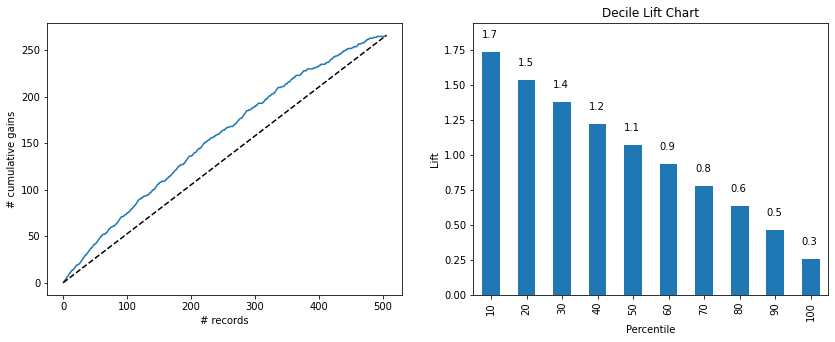

In [ ]:
#dataframe for actuals vs probabilities vs predictions
logit_result = pd.DataFrame({'Actual': valid_y,
                             'prob_0': [p[0] for p in logitreg_prob],  # non-spender
                             'prob_1': [p[1] for p in logitreg_prob],  # spender
                             'Predicted': logitreg_pred})

#creating another DF and sorting by prob_1, ascending manner
df = logit_result.sort_values(by=['prob_1'],ascending=False)

#Gains and Lift Chart - Full Regression
fig, axes = plt.subplots(1,2, figsize=(14,5))
gainsChart(df.Actual, ax=axes[0])
liftChart(df['prob_1'],ax=axes[1])

# Forward Selection - Logistic Regression

In [ ]:
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Build logistic regression classifier to use in feature selection
clf = LogisticRegression(solver='liblinear', C=1e42, random_state=1)

# Build step forward feature selection
sfs1 = sfs(clf,
           k_features='best',
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform forward feature selection
sfs1 = sfs1.fit(train_X, train_y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.5s finished

[2022-08-11 13:59:38] Features: 1/33 -- score: 0.6079207920792079[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.4s finished

[2022-08-11 13:59:38] Features: 2/33 -- score: 0.6554455445544555[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.4s finished

[2022-08-11 13:59:39] Features: 3/33 -- score: 0.6613861386138614[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [ ]:
# Which features?
feat_cols = list(sfs1.k_feature_idx_)
display(feat_cols)

display(train_X.columns[list(sfs1.k_feature_idx_)])

[0, 3, 5, 6, 8, 9, 10, 11, 14, 16, 27, 28]

Index(['Art', 'Physicalactivity', 'Computertechnology', 'Extrovert', 'Trendy',
       'Friendliness', 'Trustworthiness', 'Loveforanimals',
       'Conscientiousness', 'PoliticalAwareness', 'Gender_male',
       'Education_college/bachelor degree'],
      dtype='object')

In [ ]:
# Build regression model with selected features
clf = LogisticRegression(solver='liblinear', C=1e42, random_state=1)
clf.fit(train_X.iloc[:, feat_cols], train_y)

#calculate predictions using predict
y_train_predfwd = clf.predict(train_X.iloc[:, feat_cols])
display('Training accuracy on selected features: %.3f' % acc(train_y, y_train_predfwd))

y_valid_predfwd = clf.predict(valid_X.iloc[:, feat_cols])
display('Testing accuracy on selected features: %.3f' % acc(valid_y, y_valid_predfwd))

'Training accuracy on selected features: 0.671'

'Testing accuracy on selected features: 0.651'

In [ ]:
#calculate probabilities using predict_proba
logitreg_probfwd = clf.predict_proba(valid_X.iloc[:,feat_cols])

In [ ]:
#confusion matrix using training data 
classificationSummary(train_y, y_train_predfwd)


Confusion Matrix (Accuracy 0.6713)

       Prediction
Actual   0   1
     0 151  86
     1  80 188


In [ ]:
#confusion matrix using validation data
classificationSummary(valid_y, y_valid_predfwd)


Confusion Matrix (Accuracy 0.6515)

       Prediction
Actual   0   1
     0 151  88
     1  88 178


In [ ]:
Forward_ClassReport = {'Metrics': ['Accuracy', 'Precision','Recall', 'F1-Score'],
                       'Train' :  [metrics.accuracy_score(train_y, y_train_predfwd),
                                   metrics.precision_score(train_y, y_train_predfwd),
                                   metrics.recall_score(train_y, y_train_predfwd),
                                   metrics.f1_score(train_y, y_train_predfwd)],               
                       'Validation' : [metrics.accuracy_score(valid_y, y_valid_predfwd),
                                       metrics.precision_score(valid_y, y_valid_predfwd),
                                       metrics.recall_score(valid_y, y_valid_predfwd),
                                       metrics.f1_score(valid_y, y_valid_predfwd)]
                }
ClassReport_ForwElim = pd.DataFrame(Forward_ClassReport)     
ClassReport_ForwElim      

Metrics     Train  Validation
0   Accuracy  0.671287    0.651485
1  Precision  0.686131    0.669173
2     Recall  0.701493    0.669173
3   F1-Score  0.693727    0.669173

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [ ]:
# evaluate model using MSE
#display('ForwardModelMSE:', (mean_squared_error(valid_y,clf.predict(train_X.iloc[:, feat_cols]))))

In [ ]:
clf.coef_

array([[ 0.0103649 ,  0.34361449,  0.07565797,  0.0211392 ,  0.88584929,
        -0.0325628 ,  0.15294177,  0.39747109, -0.06970971, -0.00652666,
         0.24916482, -0.17418987]])

In [ ]:
#display the selected features, coefficients and odds ratio
display('intercept', clf.intercept_)
forward = pd.DataFrame({'coef': clf.coef_[0], 'odds': np.e**clf.coef_[0]}, index=train_X.iloc[:, feat_cols].columns)
forward

'intercept'

array([-5.6253374])

coef      odds
Art                                0.010365  1.010419
Physicalactivity                   0.343614  1.410035
Computertechnology                 0.075658  1.078594
Extrovert                          0.021139  1.021364
Trendy                             0.885849  2.425043
Friendliness                      -0.032563  0.967962
Trustworthiness                    0.152942  1.165257
Loveforanimals                     0.397471  1.488057
Conscientiousness                 -0.069710  0.932665
PoliticalAwareness                -0.006527  0.993495
Gender_male                        0.249165  1.282953
Education_college/bachelor degree -0.174190  0.840137

In [ ]:
# Build full model on ALL features, for comparison
clf2 = LogisticRegression(solver='liblinear', C=1e42, random_state=1)
clf2.fit(train_X, train_y)

y_train_pred = clf2.predict(train_X)
display('Training accuracy on all features: %.3f' % acc(train_y, y_train_pred))

y_test_pred = clf2.predict(valid_X)
display('Testing accuracy on all features: %.3f' % acc(valid_y, y_test_pred))

'Training accuracy on all features: 0.679'

'Testing accuracy on all features: 0.622'

In [ ]:
#clf2.coef_

In [ ]:
#display('intercept', clf2.intercept_)
#display(pd.DataFrame({'coef': clf2.coef_[0], 'odds': np.e**clf2.coef_[0]}, index=train_X.columns))

# Backward Elimination - Logistic Regression


In [ ]:
# step backward feature selection

clf3 = LogisticRegression(solver='liblinear', C=1e42, random_state=1)

sfs2 = sfs(clf3, 
           k_features='best', 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=5)

sfs2 = sfs2.fit(np.array(train_X), train_y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    2.4s finished

[2022-08-11 14:06:12] Features: 32/1 -- score: 0.6217821782178218[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    2.2s finished

[2022-08-11 14:06:14] Features: 31/1 -- score: 0.6356435643564357[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    2.0s finished

[2022-08-11 14:06:16] Features: 30/1 -- score: 0.6376237623762376[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [ ]:
# Which features?
feat_cols2 = list(sfs2.k_feature_idx_)
feat_cols2

display(train_X.columns[list(sfs2.k_feature_idx_)])

Index(['Physicalactivity', 'Diligence', 'Trendy', 'Trustworthiness',
       'Loveforanimals', 'Alcohol_never',
       'Internetusage_less than an hour a day'],
      dtype='object')

In [ ]:
# Build regression model with selected features
clf3 = LogisticRegression(solver='liblinear', C=1e42, random_state=1)
clf3.fit(train_X.iloc[:, feat_cols2], train_y)

#calculate predictions using predict
y_train_predbwd = clf3.predict(train_X.iloc[:, feat_cols2])
display('Training accuracy on selected features: %.3f' % acc(train_y, y_train_predbwd))

y_valid_predbwd = clf3.predict(valid_X.iloc[:, feat_cols2])
display('Testing accuracy on selected features: %.3f' % acc(valid_y, y_valid_predbwd))

'Training accuracy on selected features: 0.661'

'Testing accuracy on selected features: 0.642'

In [ ]:
#calculate probabilities using predict_proba
logitreg_probbwd = clf3.predict_proba(valid_X.iloc[:,feat_cols2])

In [ ]:
#confusion matrix using training data 
classificationSummary(train_y, y_train_predbwd)

Confusion Matrix (Accuracy 0.6614)

       Prediction
Actual   0   1
     0 142  95
     1  76 192


In [ ]:
#confusion matrix using validation data 
classificationSummary(valid_y, y_valid_predbwd)

Confusion Matrix (Accuracy 0.6416)

       Prediction
Actual   0   1
     0 145  94
     1  87 179


In [ ]:
Backward_ClassReport = {'Metrics': ['Accuracy', 'Precision','Recall', 'F1-Score'],
                       'Train' :  [metrics.accuracy_score(train_y,  y_train_predbwd),
                                   metrics.precision_score(train_y,  y_train_predbwd),
                                   metrics.recall_score(train_y,  y_train_predbwd),
                                   metrics.f1_score(train_y,  y_train_predbwd)],
                       'Validation' : [metrics.accuracy_score(valid_y, y_valid_predbwd),
                                       metrics.precision_score(valid_y, y_valid_predbwd),
                                       metrics.recall_score(valid_y, y_valid_predbwd),
                                       metrics.f1_score(valid_y, y_valid_predbwd)]
                }
ClassReport_BackElim = pd.DataFrame(Backward_ClassReport)     
ClassReport_BackElim   

Metrics     Train  Validation
0   Accuracy  0.661386    0.641584
1  Precision  0.668990    0.655678
2     Recall  0.716418    0.672932
3   F1-Score  0.691892    0.664193

In [ ]:
# evaluate model using MSE
display('BackwardModelMSE:', (mean_squared_error(valid_y,clf3.predict(train_X.iloc[:, feat_cols2]))))

'BackwardModelMSE:'

0.5089108910891089

In [ ]:
clf3.coef_

array([[ 0.37813899, -0.15509341,  0.86610391,  0.19745292,  0.42174187,
        -0.4588213 , -0.68761337]])

In [ ]:
#display the selected features, coefficients and odds ratio
display('intercept', clf3.intercept_)
display(pd.DataFrame({'coef': clf3.coef_[0], 'odds': np.e**clf3.coef_[0]}, index=train_X.iloc[:, feat_cols2].columns))

'intercept'

array([-5.25221246])

coef      odds
Physicalactivity                       0.378139  1.459566
Diligence                             -0.155093  0.856335
Trendy                                 0.866104  2.377629
Trustworthiness                        0.197453  1.218296
Loveforanimals                         0.421742  1.524615
Alcohol_never                         -0.458821  0.632028
Internetusage_less than an hour a day -0.687613  0.502775

In [ ]:
# Build full model on ALL features, for comparison
clf4 = LogisticRegression(solver='liblinear', C=1e42, random_state=1)
clf4.fit(train_X, train_y)

y_train_pred = clf4.predict(train_X)
display('Training accuracy on all features: %.3f' % acc(train_y, y_train_pred))

y_test_pred = clf4.predict(valid_X)
display('Testing accuracy on all features: %.3f' % acc(valid_y, y_test_pred))

'Training accuracy on all features: 0.679'

'Testing accuracy on all features: 0.622'

In [ ]:
#display('intercept', clf4.intercept_)
#display(pd.DataFrame({'coef': clf4.coef_[0], 'odds': np.e**clf4.coef_[0]}, index=train_X.columns))

# Stepwise Elimination - Logistic Regression

In [ ]:
# stepwise feature elimination

clf5 = LogisticRegression(solver='liblinear', C=1e42, random_state=1)

sfs3 = sfs(clf5, 
           k_features='best', 
           forward=True, 
           floating=True, 
           verbose=2,
           scoring='accuracy',
           cv=5)

sfs3 = sfs3.fit(np.array(train_X), train_y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.4s finished

[2022-08-11 14:09:13] Features: 1/33 -- score: 0.6079207920792079[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2022-08-11 14:09:13] Features: 2/33 -- score: 0.6554455445544555[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jo

In [ ]:
# Which features?
feat_cols3 = list(sfs3.k_feature_idx_)
feat_cols3

display(train_X.columns[list(sfs3.k_feature_idx_)])

Index(['Art', 'Physicalactivity', 'Computertechnology', 'Extrovert', 'Trendy',
       'Friendliness', 'Trustworthiness', 'Loveforanimals',
       'Conscientiousness', 'Gender_male',
       'Education_college/bachelor degree'],
      dtype='object')

In [ ]:
# Build regression model with selected features
clf5 = LogisticRegression(solver='liblinear', C=1e42, random_state=1)
clf5.fit(train_X.iloc[:, feat_cols3], train_y)

#calculate predictions using predict
y_train_predsw = clf5.predict(train_X.iloc[:, feat_cols3])
display('Training accuracy on selected features: %.3f' % acc(train_y, y_train_predsw))

y_valid_predsw = clf5.predict(valid_X.iloc[:, feat_cols3])
display('Testing accuracy on selected features: %.3f' % acc(valid_y, y_valid_predsw))

'Training accuracy on selected features: 0.671'

'Testing accuracy on selected features: 0.650'

In [ ]:
#calculate probabilities using predict_proba
logitreg_probsw = clf5.predict_proba(valid_X.iloc[:,feat_cols3])

In [ ]:
#confusion matrix using training data
classificationSummary(train_y, y_train_predsw)


Confusion Matrix (Accuracy 0.6713)

       Prediction
Actual   0   1
     0 150  87
     1  79 189


In [ ]:
#confusion matrix using validation data 
classificationSummary(valid_y, y_valid_predsw)

Confusion Matrix (Accuracy 0.6495)

       Prediction
Actual   0   1
     0 151  88
     1  89 177


In [ ]:
Stepwise_ClassReport = {'Metrics': ['Accuracy', 'Precision','Recall', 'F1-Score'],
                       'Train' :  [metrics.accuracy_score(train_y, y_train_predsw),
                                   metrics.precision_score(train_y, y_train_predsw),
                                   metrics.recall_score(train_y, y_train_predsw),
                                   metrics.f1_score(train_y, y_train_predsw)],
                       'Validation' : [metrics.accuracy_score(valid_y, y_valid_predsw),
                                       metrics.precision_score(valid_y, y_valid_predsw),
                                       metrics.recall_score(valid_y, y_valid_predsw),
                                       metrics.f1_score(valid_y, y_valid_predsw)]
                }
ClassReport_StepWElim = pd.DataFrame(Stepwise_ClassReport)     
ClassReport_StepWElim  

Metrics     Train  Validation
0   Accuracy  0.671287    0.649505
1  Precision  0.684783    0.667925
2     Recall  0.705224    0.665414
3   F1-Score  0.694853    0.666667

In [ ]:
#display the selected features, coefficients and odds ratio
display('intercept', clf5.intercept_)
display(pd.DataFrame({'coef': clf5.coef_[0], 'odds': np.e**clf5.coef_[0]}, index=train_X.iloc[:, feat_cols3].columns))

'intercept'

array([-5.6252451])

coef      odds
Art                                0.008347  1.008382
Physicalactivity                   0.342993  1.409159
Computertechnology                 0.076032  1.078997
Extrovert                          0.021004  1.021226
Trendy                             0.883496  2.419342
Friendliness                      -0.032584  0.967941
Trustworthiness                    0.152426  1.164656
Loveforanimals                     0.397512  1.488118
Conscientiousness                 -0.070413  0.932009
Gender_male                        0.246457  1.279484
Education_college/bachelor degree -0.175770  0.838811

In [ ]:
# Build full model on ALL features, for comparison
clf6 = LogisticRegression(solver='liblinear', C=1e42, random_state=1)
clf6.fit(train_X, train_y)

y_train_pred = clf6.predict(train_X)
display('Training accuracy on all features: %.3f' % acc(train_y, y_train_pred))

y_test_pred = clf6.predict(valid_X)
display('Testing accuracy on all features: %.3f' % acc(valid_y, y_test_pred))

'Training accuracy on all features: 0.679'

'Testing accuracy on all features: 0.622'

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.pylab as plt
!pip install dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# removing sciences, math, language and geography, and finances.
# use original categorical variables for ease of generating dummy variables for regression  
# removing educational
X = millenials_df[['Art','Happiness','Spritualbeliefs','Physicalactivity',
                'Socialawareness',	'Computertechnology',	'Extrovert',	'Diligence','Trendy',	'Friendliness',	'Trustworthiness',	'Loveforanimals',
                'Irritability',	'Pretentiousness',	'Conscientiousness', 'Righteousness',
                'PoliticalAwareness',	'Empathy2', 'Age','Height','Weight',	'Numberofsiblings',
                'Smoking',	'Alcohol', 	'Internetusage','Gender',
               'Education','Villagetown','Houseblockofflats']]
y = millenials_df['Spend_Binary']

In [ ]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.5, random_state=1)

In [ ]:
#converting string variables to numeric for decision tree
le = preprocessing.LabelEncoder()
train_X_DT = train_X.apply(le.fit_transform)
valid_X_DT = valid_X.apply(le.fit_transform)

In [ ]:
train_X_DT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505 entries, 310 to 37
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Art                 505 non-null    int64
 1   Happiness           505 non-null    int64
 2   Spritualbeliefs     505 non-null    int64
 3   Physicalactivity    505 non-null    int64
 4   Socialawareness     505 non-null    int64
 5   Computertechnology  505 non-null    int64
 6   Extrovert           505 non-null    int64
 7   Diligence           505 non-null    int64
 8   Trendy              505 non-null    int64
 9   Friendliness        505 non-null    int64
 10  Trustworthiness     505 non-null    int64
 11  Loveforanimals      505 non-null    int64
 12  Irritability        505 non-null    int64
 13  Pretentiousness     505 non-null    int64
 14  Conscientiousness   505 non-null    int64
 15  Righteousness       505 non-null    int64
 16  PoliticalAwareness  505 non-null    int64
 

In [ ]:
fullClassTree = DecisionTreeClassifier(random_state=1)
fullClassTree.fit(train_X_DT,train_y)

DecisionTreeClassifier(random_state=1)

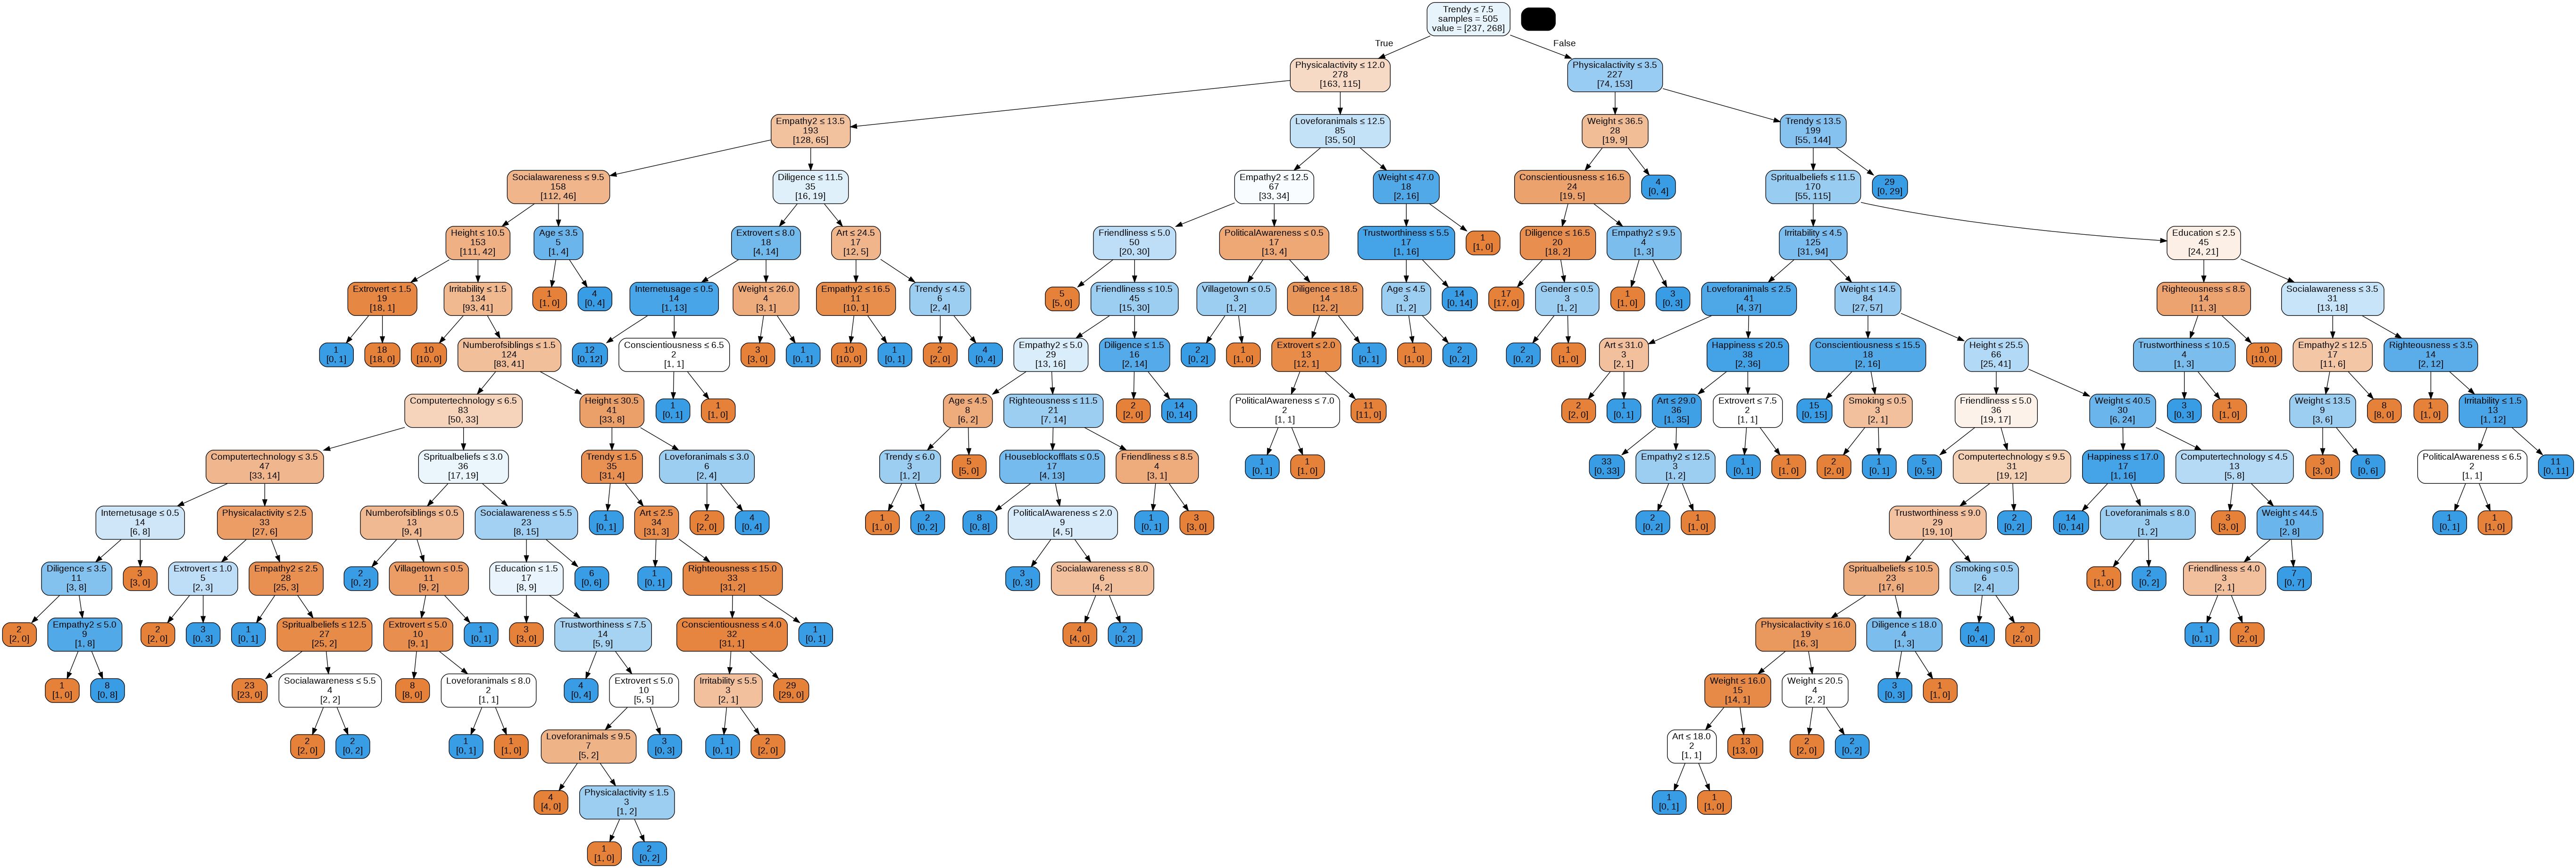

In [ ]:
plotDecisionTree(fullClassTree, feature_names=train_X_DT.columns)

In [ ]:
#checking for accuracy using valid dataset
classificationSummary(valid_y,fullClassTree.predict(valid_X_DT))

Confusion Matrix (Accuracy 0.5822)

       Prediction
Actual   0   1
     0 121 118
     1  93 173


# Cross Validation

In [ ]:
param_grid = {'criterion':['gini','entropy'],
    'max_depth':[5,7,8,9,10,11,12],
    'min_samples_split':[0.10,0.07,0.05,0.01,0.005],
    'min_impurity_decrease': [0.10,0.05, 0.02, 0.01, 0.001]
}

In [ ]:
gridsearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, n_jobs=1)
gridsearch.fit(train_X_DT, train_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 8, 9, 10, 11, 12],
                         'min_impurity_decrease': [0.1, 0.05, 0.02, 0.01,
                                                   0.001],
                         'min_samples_split': [0.1, 0.07, 0.05, 0.01, 0.005]})

In [ ]:
gridsearch.best_score_

0.6217821782178218

In [ ]:
gridsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_impurity_decrease': 0.01,
 'min_samples_split': 0.05}

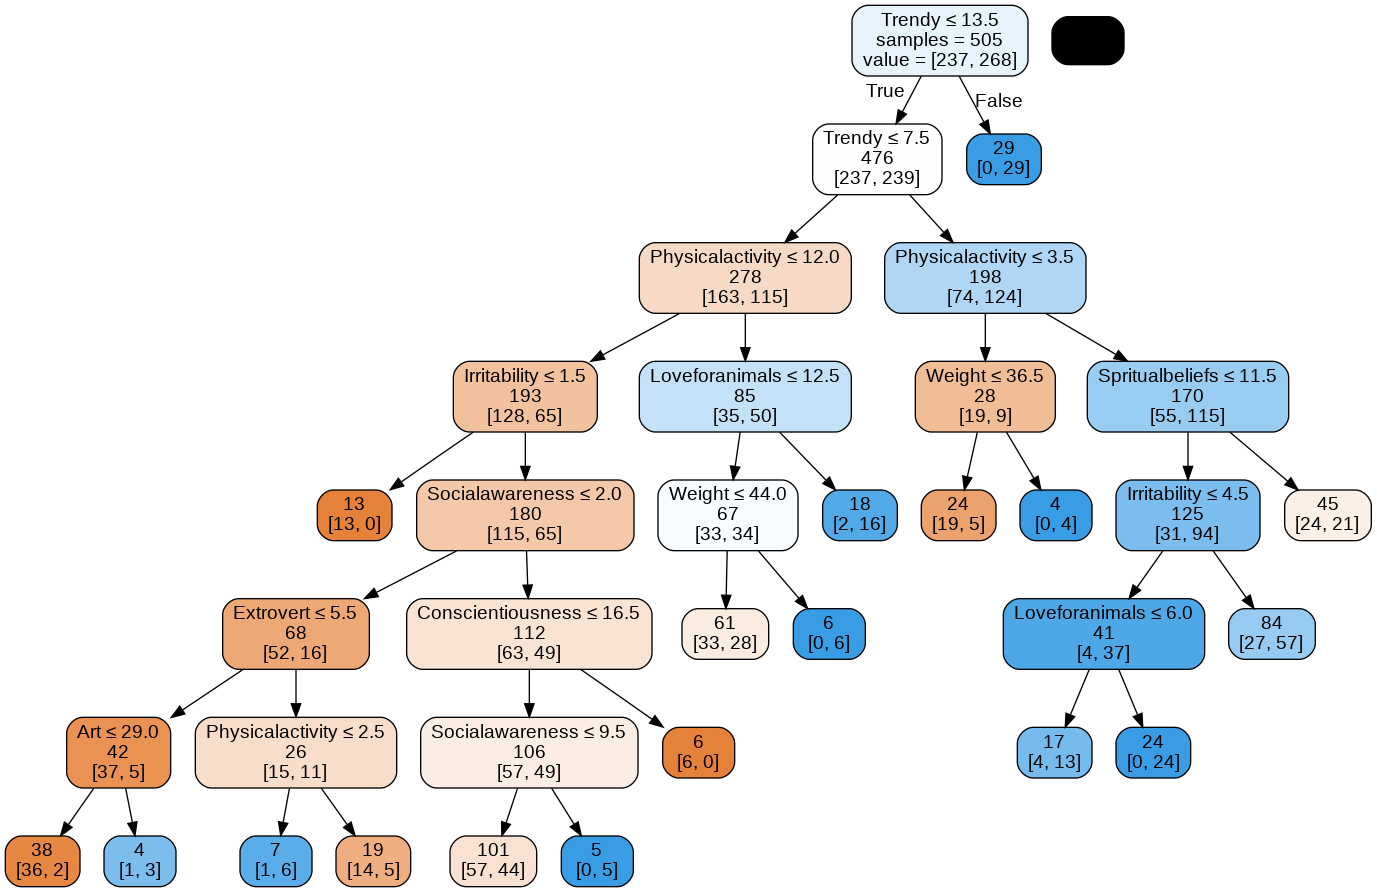

In [ ]:
gridClassTree = DecisionTreeClassifier(criterion='entropy',max_depth=7,min_impurity_decrease=0.01,min_samples_split=0.05, random_state=1)
gridClassTree.fit(train_X_DT, train_y)
plotDecisionTree(gridClassTree, feature_names=train_X_DT.columns)

In [ ]:
besttree=gridsearch.best_estimator_

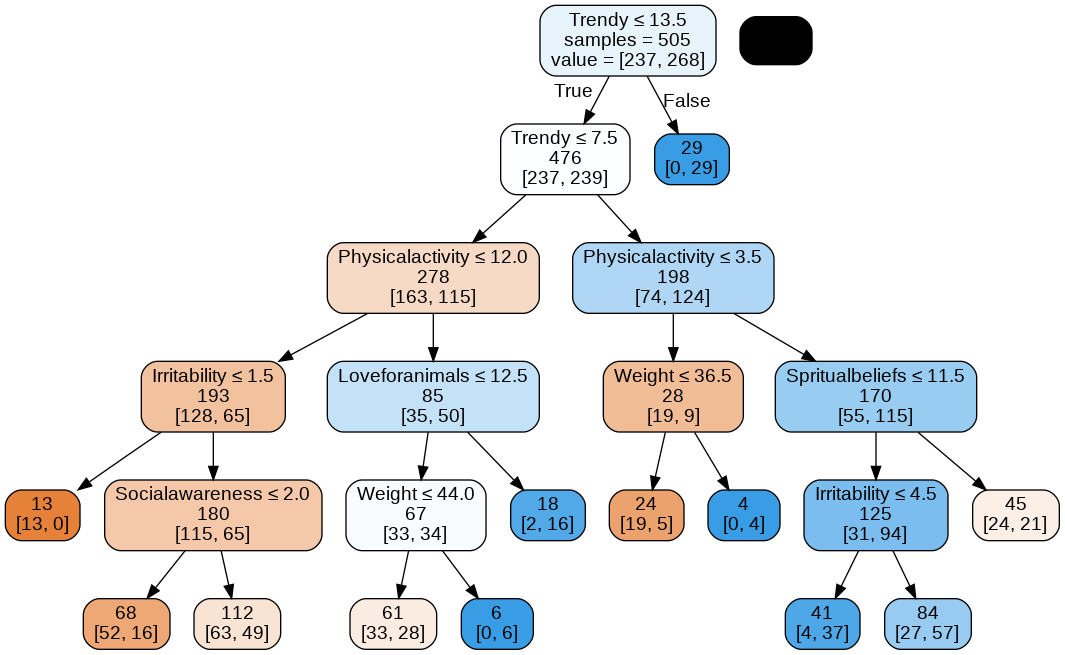

In [ ]:
plotDecisionTree(besttree, feature_names=train_X_DT.columns)

In [ ]:
#checking for accuracy using valid dataset
classificationSummary(valid_y,besttree.predict(valid_X_DT))

Confusion Matrix (Accuracy 0.6257)

       Prediction
Actual   0   1
     0 178  61
     1 128 138


# Confusion Matrices

**Full Logistic Regression**

In [ ]:
from sklearn.metrics import  confusion_matrix

full_new = confusion_matrix(valid_y, logitreg_pred)

print("Confusion matrix:\n")
print(full_new)
tn = full_new[0][0]
fp = full_new[0][1]
fn = full_new[1][0]
tp = full_new[1][1]

print("\nTotal number of true positives", tp)
print("Total number of false negatives",fn)
print("Total number of false positives",fp)
print("Total number of true negatives",tn)

acc=float(tp+tn)/(tp+tn+fp+fn)

print('\nClassifier Accuracy: %.2f%%' % (acc * 100))

tpr = float(tp)/(tp+fn)

print('True Positive Rate (TPR/Recall/Sensitivity): %.2f%%' % (tpr * 100))

specificity = float (tn)/(tn+fp)

print ("True Negative Rate (TNR/Specificity/selectivity):%.2f%%" % (specificity*100)) 

fpr = float(fp)/(fp+tn)
print("False Positive Rate (FPR): %.2f%%" % (fpr * 100))

fnr = fn/ (fn+ tp)
print("False Negative Rate (FNR): %.2f%%" % (fnr*100))

precision=float(tp)/(tp+fp)
print("Precision/Positive Predictive value:%.2f%%" %(precision*100))

fScore = 2*((precision*tpr)/(precision+tpr))
print("F1-Score: %.2f%%" %(fScore*100))

Confusion matrix:

[[146  93]
 [ 98 168]]

Total number of true positives 168
Total number of false negatives 98
Total number of false positives 93
Total number of true negatives 146

Classifier Accuracy: 62.18%
True Positive Rate (TPR/Recall/Sensitivity): 63.16%
True Negative Rate (TNR/Specificity/selectivity):61.09%
False Positive Rate (FPR): 38.91%
False Negative Rate (FNR): 36.84%
Precision/Positive Predictive value:64.37%
F1-Score: 63.76%


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [ ]:
# evaluate model using MSE
display('FullModelMSE:', mean_squared_error(valid_y,logitreg_pred))

'FullModelMSE:'

0.3782178217821782

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

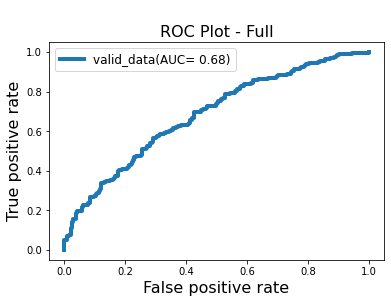

In [ ]:
y_pred_probafull = logitreg_prob[::,1] #calculate probabilities for high spender YES (label=1)

fpr, tpr, _ = roc_curve(valid_y, y_pred_probafull) # calculate tpr and fpr values

auc = roc_auc_score(valid_y, y_pred_probafull) #calculate auc value


plt.plot(fpr,tpr,label="valid_data(AUC= %0.2f)" % auc, linewidth = 4) #plot ROC curve
plt.legend(prop={'size':12},loc='best') #set the legend properties
plt.title('\nROC Plot - Full',fontsize = 16) #title
plt.xlabel('False positive rate', fontsize = 16) #x and y labels
plt.ylabel('True positive rate', fontsize = 16)
plt.show() #display the plot

In [ ]:
fpr, tpr, _ = roc_curve(valid_y, y_pred_probafull) # calculate tpr and fpr values

auc = roc_auc_score(valid_y, y_pred_probafull) #calculate auc value
print(auc)

0.683251014565703


**Forward Selection**

In [ ]:
fwdnew = confusion_matrix(valid_y, y_valid_predfwd)

print("Confusion matrix:\n")
print(fwdnew)
tn = fwdnew[0][0]
fp = fwdnew[0][1]
fn = fwdnew[1][0]
tp = fwdnew[1][1]

print("\nTotal number of true positives",tp)
print("Total number of false negatives",fn)
print("Total number of false positives",fp)
print("Total number of true negatives",tn)

acc=float(tp+tn)/(tp+tn+fp+fn)

print('\nClassifier Accuracy: %.2f%%' % (acc * 100))

tpr = float(tp)/(tp+fn)

print('True Positive Rate (TPR/Recall/Sensitivity): %.2f%%' % (tpr * 100))

specificity = float (tn)/(tn+fp)

print ("True Negative Rate (TNR/Specificity/selectivity):%.2f%%" % (specificity*100)) 

fpr = float(fp)/(fp+tn)
print("False Positive Rate (FPR): %.2f%%" % (fpr * 100))

fnr = fn/ (fn+ tp)
print("False Negative Rate (FNR): %.2f%%" % (fnr*100))

precision=float(tp)/(tp+fp)
print("Precision/Positive Predictive value:%.2f%%" %(precision*100))

fScore = 2*((precision*tpr)/(precision+tpr))
print("F1-Score: %.2f%%" %(fScore*100))

Confusion matrix:

[[151  88]
 [ 88 178]]

Total number of true positives 178
Total number of false negatives 88
Total number of false positives 88
Total number of true negatives 151

Classifier Accuracy: 65.15%
True Positive Rate (TPR/Recall/Sensitivity): 66.92%
True Negative Rate (TNR/Specificity/selectivity):63.18%
False Positive Rate (FPR): 36.82%
False Negative Rate (FNR): 33.08%
Precision/Positive Predictive value:66.92%
F1-Score: 66.92%


In [ ]:
# evaluate model using MSE
display('FwdModelMSE:', mean_squared_error(valid_y,y_valid_predfwd))

'FwdModelMSE:'

0.3485148514851485

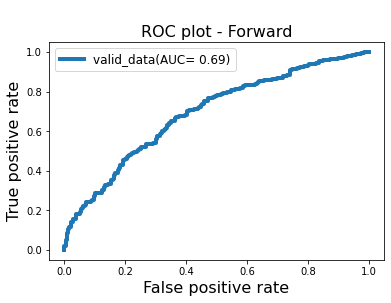

In [ ]:
y_pred_probafwd = logitreg_probfwd[::,1] #calculate probabilities for high spender YES (label=1)

fpr, tpr, _ = roc_curve(valid_y, y_pred_probafwd) # calculate tpr and fpr values

auc = roc_auc_score(valid_y, y_pred_probafwd) #calculate auc value


plt.plot(fpr,tpr,label="valid_data(AUC= %0.2f)" % auc, linewidth = 4) #plot ROC curve
plt.legend(prop={'size':12},loc='best') #set the legend properties
plt.title('\nROC plot - Forward',fontsize = 16) #title
plt.xlabel('False positive rate', fontsize = 16) #x and y labels
plt.ylabel('True positive rate', fontsize = 16)
plt.show() #display the plot

In [ ]:
fpr, tpr, _ = roc_curve(valid_y, y_pred_probafwd) # calculate tpr and fpr values

auc = roc_auc_score(valid_y, y_pred_probafwd) #calculate auc value
print(auc)

0.6909585679680372


**Backward Selection**

In [ ]:
bwd_new = confusion_matrix(valid_y, y_valid_predbwd)

print("Confusion matrix:\n")
print(bwd_new)
tn = bwd_new[0][0]
fp = bwd_new[0][1]
fn = bwd_new[1][0]
tp = bwd_new[1][1]

print("\nTotal number of true positives", tp)
print("Total number of false negatives",fn)
print("Total number of false positives",fp)
print("Total number of true negatives",tn)

acc=float(tp+tn)/(tp+tn+fp+fn)

print('\nClassifier Accuracy: %.2f%%' % (acc * 100))

tpr = float(tp)/(tp+fn)

print('True Positive Rate (TPR/Recall/Sensitivity): %.2f%%' % (tpr * 100))

specificity = float (tn)/(tn+fp)

print ("True Negative Rate (TNR/Specificity/selectivity):%.2f%%" % (specificity*100)) 

fpr = float(fp)/(fp+tn)
print("False Positive Rate (FPR): %.2f%%" % (fpr * 100))

fnr = fn/ (fn+ tp)
print("False Negative Rate (FNR): %.2f%%" % (fnr*100))

precision=float(tp)/(tp+fp)
print("Precision/Positive Predictive value:%.2f%%" %(precision*100))

fScore = 2*((precision*tpr)/(precision+tpr))
print("F1-Score: %.2f%%" %(fScore*100))

Confusion matrix:

[[145  94]
 [ 87 179]]

Total number of true positives 179
Total number of false negatives 87
Total number of false positives 94
Total number of true negatives 145

Classifier Accuracy: 64.16%
True Positive Rate (TPR/Recall/Sensitivity): 67.29%
True Negative Rate (TNR/Specificity/selectivity):60.67%
False Positive Rate (FPR): 39.33%
False Negative Rate (FNR): 32.71%
Precision/Positive Predictive value:65.57%
F1-Score: 66.42%


In [ ]:
# evaluate model using MSE
display('BwdModelMSE:', mean_squared_error(valid_y,y_valid_predbwd))

'BwdModelMSE:'

0.3584158415841584

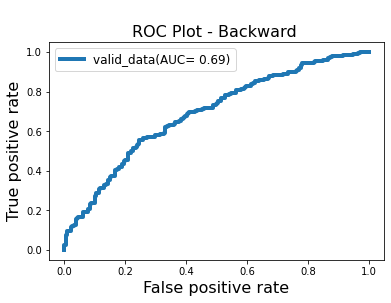

In [ ]:
y_pred_probabwd = logitreg_probbwd[::,1] #calculate probabilities for high spender YES (label=1)

fpr, tpr, _ = roc_curve(valid_y, y_pred_probabwd) # calculate tpr and fpr values

auc = roc_auc_score(valid_y, y_pred_probabwd) #calculate auc value


plt.plot(fpr,tpr,label="valid_data(AUC= %0.2f)" % auc, linewidth = 4) #plot ROC curve
plt.legend(prop={'size':12},loc='best') #set the legend properties
plt.title('\nROC Plot - Backward ',fontsize = 16) #title
plt.xlabel('False positive rate', fontsize = 16) #x and y labels
plt.ylabel('True positive rate', fontsize = 16)
plt.show() #display the plot

In [ ]:
fpr, tpr, _ = roc_curve(valid_y, y_pred_probabwd) # calculate tpr and fpr values

auc = roc_auc_score(valid_y, y_pred_probabwd) #calculate auc value
print(auc)

0.689527165193318


**Stepwise Selection**

In [ ]:
stpwise_new = confusion_matrix(valid_y, y_valid_predsw)

print("Confusion matrix:\n")
print(stpwise_new)
tn = stpwise_new[0][0]
fp = stpwise_new[0][1]
fn = stpwise_new[1][0]
tp = stpwise_new[1][1]

print("\nTotal number of true positives", tp)
print("Total number of false negatives",fn)
print("Total number of false positives",fp)
print("Total number of true negatives",tn)

acc=float(tp+tn)/(tp+tn+fp+fn)

print('\nClassifier Accuracy: %.2f%%' % (acc * 100))

tpr = float(tp)/(tp+fn)

print('True Positive Rate (TPR/Recall/Sensitivity): %.2f%%' % (tpr * 100))

specificity = float (tn)/(tn+fp)

print ("True Negative Rate (TNR/Specificity/selectivity):%.2f%%" % (specificity*100)) 

fpr = float(fp)/(fp+tn)
print("False Positive Rate (FPR): %.2f%%" % (fpr * 100))

fnr = fn/ (fn+ tp)
print("False Negative Rate (FNR): %.2f%%" % (fnr*100))

precision=float(tp)/(tp+fp)
print("Precision/Positive Predictive value:%.2f%%" %(precision*100))

fScore = 2*((precision*tpr)/(precision+tpr))
print("F1-Score: %.2f%%" %(fScore*100))

Confusion matrix:

[[151  88]
 [ 89 177]]

Total number of true positives 177
Total number of false negatives 89
Total number of false positives 88
Total number of true negatives 151

Classifier Accuracy: 64.95%
True Positive Rate (TPR/Recall/Sensitivity): 66.54%
True Negative Rate (TNR/Specificity/selectivity):63.18%
False Positive Rate (FPR): 36.82%
False Negative Rate (FNR): 33.46%
Precision/Positive Predictive value:66.79%
F1-Score: 66.67%


In [ ]:
# evaluate model using MSE
display('SwModelMSE:', mean_squared_error(valid_y,y_valid_predsw))

'SwModelMSE:'

0.3504950495049505

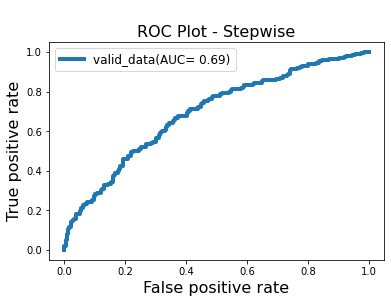

In [ ]:
y_pred_probasw = logitreg_probsw[::,1] #calculate probabilities for high spender YES (label=1)

fpr, tpr, _ = roc_curve(valid_y, y_pred_probasw) # calculate tpr and fpr values

auc = roc_auc_score(valid_y, y_pred_probasw) #calculate auc value


plt.plot(fpr,tpr,label="valid_data(AUC= %0.2f)" % auc, linewidth = 4) #plot ROC curve
plt.legend(prop={'size':12},loc='best') #set the legend properties
plt.title('\nROC Plot - Stepwise',fontsize = 16) #title
plt.xlabel('False positive rate', fontsize = 16) #x and y labels
plt.ylabel('True positive rate', fontsize = 16)
plt.show() #display the plot

In [ ]:
fpr, tpr, _ = roc_curve(valid_y, y_pred_probasw) # calculate tpr and fpr values

auc = roc_auc_score(valid_y, y_pred_probasw) #calculate auc value
print(auc)

0.6910686758737848


**DT - Full**

In [ ]:
dt_new = confusion_matrix(valid_y, fullClassTree.predict(valid_X_DT))

print("Confusion matrix:\n")
print(dt_new)
tn = dt_new[0][0]
fp = dt_new[0][1]
fn = dt_new[1][0]
tp = dt_new[1][1]

print("\nTotal number of true positives", tp)
print("Total number of false negatives",fn)
print("Total number of false positives",fp)
print("Total number of true negatives",tn)

acc=float(tp+tn)/(tp+tn+fp+fn)
print('\nClassifier Accuracy: %.2f%%' % (acc * 100))

tpr = float(tp)/(tp+fn)
print('True Positive Rate (TPR/Recall/Sensitivity): %.2f%%' % (tpr * 100))

specificity = float (tn)/(tn+fp)
print ("True Negative Rate (TNR/Specificity/selectivity):%.2f%%" % (specificity*100)) 

fpr = float(fp)/(fp+tn)
print("False Positive Rate (FPR): %.2f%%" % (fpr * 100))

fnr = fn/ (fn+ tp)
print("False Negative Rate (FNR): %.2f%%" % (fnr*100))

precision=float(tp)/(tp+fp)
print("Precision/Positive Predictive value:%.2f%%" %(precision*100))

fScore = 2*((precision*tpr)/(precision+tpr))
print("F1-Score: %.2f%%" %(fScore*100))

Confusion matrix:

[[121 118]
 [ 93 173]]

Total number of true positives 173
Total number of false negatives 93
Total number of false positives 118
Total number of true negatives 121

Classifier Accuracy: 58.22%
True Positive Rate (TPR/Recall/Sensitivity): 65.04%
True Negative Rate (TNR/Specificity/selectivity):50.63%
False Positive Rate (FPR): 49.37%
False Negative Rate (FNR): 34.96%
Precision/Positive Predictive value:59.45%
F1-Score: 62.12%


In [ ]:
# evaluate model using MSE
display('FullDTModelMSE:', mean_squared_error(valid_y,fullClassTree.predict(valid_X_DT)))

'FullDTModelMSE:'

0.4178217821782178

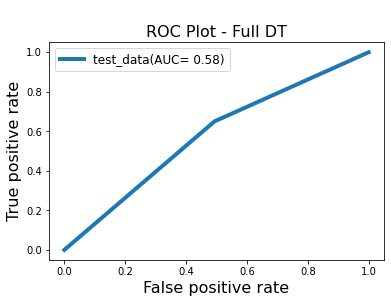

In [ ]:
y_pred_probafulldt = fullClassTree.predict_proba(valid_X_DT)[::,1] #calculate probabilities high spender (label=1)

fpr, tpr, _ = roc_curve(valid_y, y_pred_probafulldt) # calculate tpr and fpr values

auc = roc_auc_score(valid_y, y_pred_probafulldt) #calculate auc value


plt.plot(fpr,tpr,label="test_data(AUC= %0.2f)" % auc, linewidth = 4) #plot ROC curve
plt.legend(prop={'size':12},loc='best') #set the legend properties
plt.title('\nROC Plot - Full DT',fontsize = 16) #title
plt.xlabel('False positive rate', fontsize = 16) #x and y labels
plt.ylabel('True positive rate', fontsize = 16)
plt.show() #display the plot

In [ ]:
fpr, tpr, _ = roc_curve(valid_y, y_pred_probafulldt) # calculate tpr and fpr values

auc = roc_auc_score(valid_y, y_pred_probafulldt) #calculate auc value
print(auc)

0.5783260452386195


**Grid Search**

In [ ]:
bt_new = confusion_matrix(valid_y, besttree.predict(valid_X_DT))

print("Confusion matrix:\n")
print(bt_new)
tn = bt_new[0][0]
fp = bt_new[0][1]
fn = bt_new[1][0]
tp = bt_new[1][1]

print("\nTotal number of true positives", tp)
print("Total number of false negatives",fn)
print("Total number of false positives",fp)
print("Total number of true negatives",tn)

acc=float(tp+tn)/(tp+tn+fp+fn)

print('\nClassifier Accuracy: %.2f%%' % (acc * 100))

tpr = float(tp)/(tp+fn)

print('True Positive Rate (TPR/Recall/Sensitivity): %.2f%%' % (tpr * 100))

specificity = float (tn)/(tn+fp)

print ("True Negative Rate (TNR/Specificity/selectivity):%.2f%%" % (specificity*100)) 

fpr = float(fp)/(fp+tn)
print("False Positive Rate (FPR): %.2f%%" % (fpr * 100))

fnr = fn/ (fn+ tp)
print("False Negative Rate (FNR): %.2f%%" % (fnr*100))

precision=float(tp)/(tp+fp)
print("Precision/Positive Predictive value:%.2f%%" %(precision*100))

fScore = 2*((precision*tpr)/(precision+tpr))
print("F1-Score: %.2f%%" %(fScore*100))

Confusion matrix:

[[178  61]
 [128 138]]

Total number of true positives 138
Total number of false negatives 128
Total number of false positives 61
Total number of true negatives 178

Classifier Accuracy: 62.57%
True Positive Rate (TPR/Recall/Sensitivity): 51.88%
True Negative Rate (TNR/Specificity/selectivity):74.48%
False Positive Rate (FPR): 25.52%
False Negative Rate (FNR): 48.12%
Precision/Positive Predictive value:69.35%
F1-Score: 59.35%


In [ ]:
# evaluate model using MSE
display('BestDTModelMSE:', mean_squared_error(valid_y,besttree.predict(valid_X_DT)))

'BestDTModelMSE:'

0.37425742574257426

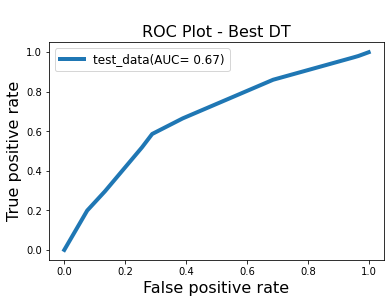

In [ ]:
y_pred_probabt = besttree.predict_proba(valid_X_DT)[::,1] #calculate probabilities for high spender YES (label=1)

fpr, tpr, _ = roc_curve(valid_y, y_pred_probabt) # calculate tpr and fpr values

auc = roc_auc_score(valid_y, y_pred_probabt) #calculate auc value


plt.plot(fpr,tpr,label="test_data(AUC= %0.2f)" % auc, linewidth = 4) #plot ROC curve
plt.legend(prop={'size':12},loc='best') #set the legend properties
plt.title('\nROC Plot - Best DT',fontsize = 16) #title
plt.xlabel('False positive rate', fontsize = 16) #x and y labels
plt.ylabel('True positive rate', fontsize = 16)
plt.show() #display the plot

In [ ]:
fpr, tpr, _ = roc_curve(valid_y, y_pred_probabt) # calculate tpr and fpr values

auc = roc_auc_score(valid_y, y_pred_probabt) #calculate auc value
print(auc)

0.6709110642715574
